<center>
<img src="../images/fscampus_small2.png" width="1200"/>
</center>

<center>

# Investments

***Finance 2 - BFIN***

**Dr. Omer Cayirli**

Lecturer in Empirical Finance

omer.cayirli@vgu.edu.vn
</center>

---

## Lecture 11

---


### Outline

* Derivatives III
  
  * Binomial Option Pricing Model
  
  * Black-Scholes Option Pricing Model

---





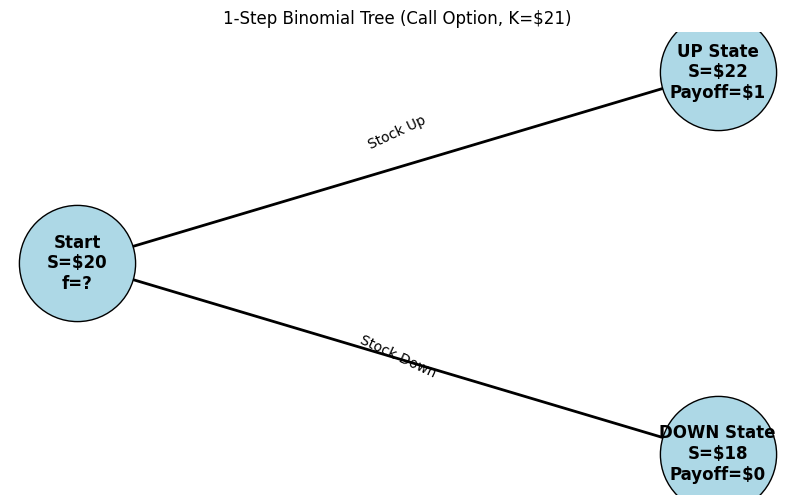

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_binomial_payoff(S0, u_price, d_price, K, option_type='Call'):
    # Calculate Option Payoffs
    if option_type == 'Call':
        payoff_u = max(u_price - K, 0)
        payoff_d = max(d_price - K, 0)
    else:
        payoff_u = max(K - u_price, 0)
        payoff_d = max(K - d_price, 0)

    # Graph Structure
    G = nx.DiGraph()
    
    # Nodes (Labeling with Price and Payoff)
    root_label = f"Start\nS=${S0}\nf=?"
    up_label = f"UP State\nS=${u_price}\nPayoff=${payoff_u}"
    down_label = f"DOWN State\nS=${d_price}\nPayoff=${payoff_d}"
    
    G.add_edge(root_label, up_label)
    G.add_edge(root_label, down_label)
    
    # Positioning
    pos = {
        root_label: (0, 0),
        up_label: (1, 1),
        down_label: (1, -1)
    }
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Draw Nodes
    nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='lightblue', edgecolors='black')
    
    # Draw Edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, width=2)
    
    # Draw Labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # Annotations
    plt.text(0.5, 0.6, "Stock Up", fontsize=10, rotation=25, ha='center')
    plt.text(0.5, -0.6, "Stock Down", fontsize=10, rotation=-25, ha='center')
    
    plt.title(f"1-Step Binomial Tree ({option_type} Option, K=${K})")
    plt.axis('off')
    plt.show()

# Run for the slide example
plot_binomial_payoff(S0=20, u_price=22, d_price=18, K=21, option_type='Call')

### Binomial Option Pricing Model

*   **Asset:** Stock ($S_0 = \$20$)
*   **Derivative:** 3-Month Call Option ($K = \$21$)
*   **Risk-Free Rate(Continuously compounded):** $r = 8\%$

**Construct the Price Tree ($T=0.25$ years)**
*   If the stock goes UP ($u$): $S_u = \$22 \rightarrow C_u = \max(22-21, 0) = \$1$
*   If the stock goes DOWN ($d$): $S_d = \$18 \rightarrow C_d = \max(18-21, 0) = \$0$

**Construct the Risk-Free Portfolio (Hedging)**
*   **Strategy:** Long $\Delta$ shares, Short 1 Call Option.
*   **Find $\Delta$:** Equate the portfolio value in the UP and DOWN states to make it riskless.
    $$V_u = V_d \Rightarrow 22\Delta - 1 = 18\Delta \Rightarrow 4\Delta = 1 \Rightarrow \Delta = 0.25$$

**Valuation (No-Arbitrage)**
*   **Future Value ($V_T$):** $22(0.25) - 1 = \$4.50$ (Riskless payoff)
*   **Present Value ($V_0$):** $4.50 \times e^{-0.08 \times 0.25} = \$4.4109    $
*   **Option Price ($f$):** Since $V_0 = \Delta S_0 - f$, then:
    $$f = \Delta S_0 - V_0 = (0.25 \times 20) - 4.4109 = \$0.5891$$

---




### Binomial Option Pricing Model: State Prices

**Security paying \$1 in UP state only (Arrow-Debreu Price $P_u$):**
*   Replicate payoff $(1, 0)$ using $\Delta$ stock and $B$ bonds.
    $$
    \begin{cases}
    \text{Up:} & \Delta S_0 u + B r = 1 \\
    \text{Down:} & \Delta S_0 d + B r = 0
    \end{cases}
    \implies
    \begin{cases}
    \Delta = \frac{1}{S_0(u - d)} \\
    B = \frac{-d}{r(u - d)}
    \end{cases}
    $$
*   **Cost ($P_u$):**
    $$ P_u = \Delta S_0 + B = \frac{1}{(u-d)} - \frac{d}{r(u-d)} = \frac{r-d}{r(u-d)} $$

**Security paying \$1 in DOWN state only (Arrow-Debreu Price $P_d$):**
*   Replicate payoff $(0, 1)$.
    $$ P_d = \frac{u-r}{r(u-d)} $$

**General Valuation Formula:**
*   Any derivative with payoffs $f_u, f_d$ can be valued as:
    $$ f = f_u P_u + f_d P_d = \frac{1}{r} \left[ \frac{r-d}{u-d} f_u + \frac{u-r}{u-d} f_d \right] $$

*(Note: $u, d, r$ are gross returns, e.g., $1 + \text{rate}$)*

---



### Binomial Option Pricing Model
* Note that buying 1 u-security and 1 d-security gives you $1 for certain. Therefore,
$$ P_u + P_d = 1/r \implies \frac{r-d}{r(u-d)} + \frac{u-r}{r(u-d)} = 1/r \implies \underbrace{\frac{r-d}{u-d}}_{P_u} + \underbrace{\frac{u-r}{u-d}}_{P_d} = 1 $$

* The parameters $p_u$ and $p_d$ should be interpreted as the probability of an up and down movement in a risk-neutral world.

* In a risk-neutral world, the expected return on a stock (or any other investment) is the risk-free rate.
$$ E(S_T) = p_u S_0 u + (1 - p_u)S_0 d \implies E(S_T) = p_u S_0 (u - d) + S_0 d \implies E(S_T) = S_0 r $$

* Risk-neutral valuation provides a very important general result in the pricing of derivatives.
  
  * It states that, when we assume the world is risk-neutral, we get the right price for a derivative in all worlds, not just in a risk-neutral one.
  
  * Results are true regardless of the assumptions we make about the evolution of the stock price.
  
  * To apply risk-neutral valuation to the pricing of a derivative,
  
    * First calculate what the probabilities of different outcomes would be if the world were risk-neutral.
  
    * Then, calculate the expected payoff from the derivative and discount that expected payoff at the risk-free rate of interest.

---



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def risk_neutral_explanation(S0, T, r_pct, u_pct, d_pct, compounding):
    # 1. Setup Factors (Consistent with previous code)
    # u and d are the explicit move sizes over the period T
    u = 1 + u_pct / 100.0
    d = 1 + d_pct / 100.0
    
    # R_gross is the risk-free growth factor over time T
    if compounding == 'Continuous':
        R_gross = np.exp(r_pct / 100.0 * T)
    else: # Discrete
        R_gross = (1 + r_pct / 100.0) ** T
    
    # 2. Arbitrage Check
    if u <= d:
        print("Error: Up factor (u) must be greater than Down factor (d)")
        return
    
    # The No-Arbitrage condition applies to the risk-free FACTOR for the period
    if not (d < R_gross < u):
        print(f"Arbitrage Opportunity Detected!")
        print(f"Condition: d < R_gross < u")
        print(f"Current:   {d:.4f} < {R_gross:.4f} < {u:.4f} -> FALSE")
        return

    # 3. Risk-Neutral Probability (p)
    # Formula: p = (e^rT - d) / (u - d)  OR  ((1+r)^T - d) / (u - d)
    p = (R_gross - d) / (u - d)
    q = 1 - p
    
    # 4. State Prices (Arrow-Debreu)
    # Value of $1 paid ONLY in that specific state, discounted to today
    State_Price_u = p / R_gross
    State_Price_d = q / R_gross
    
    # 5. Stock Price Calculation
    Su = S0 * u
    Sd = S0 * d

    # --- Output & Visualization ---
    
    print(f"--- Risk-Neutral Valuation Analysis (T={T} years) ---")
    print(f"Compounding: {compounding}")
    print(f"Risk-Free Factor (R = e^rT or (1+r)^T): {R_gross:.4f}")
    print(f"Up Factor (u): {u:.4f} | Down Factor (d): {d:.4f}")
    print("-" * 50)
    
    print(f"1. Risk-Neutral Probability (p):")
    print(f"   p = (R - d) / (u - d)")
    print(f"   p = ({R_gross:.4f} - {d:.4f}) / ({u:.4f} - {d:.4f})")
    print(f"   p = {p:.4f} ({p*100:.1f}%)")
    print(f"   q = {q:.4f} ({q*100:.1f}%)")
    print("-" * 50)
    
    print(f"2. State Prices (Present Value of $1 in specific state):")
    print(f"   State_Price_u = p / R = {State_Price_u:.4f}")
    print(f"   State_Price_d = q / R = {State_Price_d:.4f}")
    print(f"   Sum           = {State_Price_u + State_Price_d:.4f} (Must equal discount factor 1/R: {1/R_gross:.4f})")
    print("-" * 50)
    
    print(f"3. Expected Stock Value Check E[S_T]:")
    print(f"   Target S0 growth: S0 * R = ${S0:.2f} * {R_gross:.4f} = ${S0 * R_gross:.2f}")
    print(f"   Risk-Neutral calc: p*Su + q*Sd")
    print(f"                    = ({p:.4f} * ${Su:.2f}) + ({q:.4f} * ${Sd:.2f})")
    print(f"                    = ${p*Su + q*Sd:.2f}")
    
    val_check = abs((p*Su + q*Sd) - (S0 * R_gross)) < 1e-4
    print(f"   Matches? {'YES' if val_check else 'NO'}")

    # Plotting probabilities
    fig, ax = plt.subplots(figsize=(8, 2))
    
    ax.barh(['Down State (q)', 'Up State (p)'], [q, p], color=['lightcoral', 'lightgreen'])
    ax.set_xlim(0, 1)
    ax.set_title("Risk-Neutral Probabilities (must sum to 1)")
    ax.set_xlabel("Probability")
    
    # Add values on bars
    for i, v in enumerate([q, p]):
        ax.text(v + 0.02, i, f"{v:.4f}", va='center', fontweight='bold')
        
    plt.tight_layout()
    plt.show()

# Widgets
style = {'description_width': '100px'}

s0_w = widgets.FloatSlider(value=20, min=10, max=200, step=5, description='S0 ($):', style=style)
t_w = widgets.FloatSlider(value=0.25, min=0.0, max=5.0, step=0.25, description='Time (T):', style=style)
r_w = widgets.FloatSlider(value=8, min=0, max=20, step=0.5, description='Rate % (r):', style=style)
u_w = widgets.FloatSlider(value=10, min=1, max=50, step=1, description='Up %:', style=style)
d_w = widgets.FloatSlider(value=-10, min=-50, max=-1, step=1, description='Down %:', style=style)
comp_w = widgets.Dropdown(options=['Discrete', 'Continuous'], value='Discrete', description='Compounding:', style=style)

ui = widgets.VBox([
    widgets.HBox([s0_w, t_w, comp_w]),
    widgets.HBox([r_w, u_w, d_w]),
    widgets.interactive_output(risk_neutral_explanation, {
        'S0': s0_w, 
        'T': t_w, 
        'r_pct': r_w, 
        'u_pct': u_w, 
        'd_pct': d_w,
        'compounding': comp_w
    })
])

display(ui)

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets
from IPython.display import display
import numpy as np

def plot_risk_neutral_tree(S0, K, u_pct, d_pct, r_pct, T, compounding):
    """
    Interactive binomial option pricing with risk-neutral valuation.
    """
    # --- ERROR FIX: u and d are now independent of compounding mode ---
    # They are strictly 1 + percentage move (simple return)
    u = 1 + u_pct / 100.0
    d = 1 + d_pct / 100.0

    # --- ERROR FIX: Compounding only affects the risk-free rate (r) ---
    if compounding == 'Continuous':
        r = np.exp(r_pct / 100.0 * T)
    else:  # Discrete
        r = (1 + r_pct / 100.0) ** T
    
    # 1. Stock prices at T
    Su = S0 * u
    Sd = S0 * d
    
    # 2. Option payoffs (Call)
    Cu = max(Su - K, 0)
    Cd = max(Sd - K, 0)
    
    # 3. No-arbitrage check
    if u <= d:
        print("ERROR: Up factor must be greater than Down factor")
        print(f"   Current: u={u:.3f}, d={d:.3f}")
        return
    
    if not (d < r < u):
        print("ARBITRAGE OPPORTUNITY EXISTS!")
        print(f"   No-arbitrage requires: d < r < u")
        print(f"   Current: d={d:.3f}, r={r:.3f}, u={u:.3f}")
        
        if r <= d:
            print("   -> Risk-free rate too LOW: Borrow at r, invest in stock (guaranteed profit)")
        if r >= u:
            print("   -> Risk-free rate too HIGH: Short stock, lend at r (guaranteed profit)")
        return
    
    # 4. Risk-neutral probability
    p = (r - d) / (u - d)
    q = 1 - p
    
    # 5. Option pricing
    E_payoff = p * Cu + q * Cd
    C0 = E_payoff / r  # Present value
    
    # --- Create Figure with Two Panels ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # LEFT PANEL: Binomial Tree
    G = nx.DiGraph()
    
    root_label = f"t=0\nS=${S0:.2f}\nf=${C0:.2f}"
    up_label = f"t={T} (UP)\nS=${Su:.2f}\nPayoff=${Cu:.2f}"
    down_label = f"t={T} (DOWN)\nS=${Sd:.2f}\nPayoff=${Cd:.2f}"
    
    G.add_edge(root_label, up_label)
    G.add_edge(root_label, down_label)
    
    pos = {root_label: (0, 0), up_label: (1, 1), down_label: (1, -1)}
    
    nx.draw_networkx_nodes(G, pos, node_size=8000, node_color='#e6f2ff', 
                           edgecolors='black', linewidths=2, ax=ax1)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, 
                           width=2, edge_color='gray', ax=ax1)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', ax=ax1)
    
    ax1.text(0.5, 0.6, f'p = {p:.3f}', ha='center', fontsize=12, 
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8), fontweight='bold')
    ax1.text(0.5, -0.6, f'1-p = {q:.3f}', ha='center', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8), fontweight='bold')
    
    ax1.set_title(f"Binomial Tree (Strike K=${K}, T={T} years)", fontsize=12, fontweight='bold')
    ax1.axis('off')
    ax1.set_xlim(-0.5, 1.8)
    ax1.set_ylim(-1.5, 1.5)
    
    # RIGHT PANEL: Calculation Summary
    ax2.axis('off')
    
    summary_text = f"""
RISK-NEUTRAL VALUATION SUMMARY
Compounding (Applies to Rates only): {compounding}

STEP 1: Calculate Growth Factors (T={T} years)
-----------------------------------------------
Up factor (u)     = {u:.4f}  (1 + {u_pct}%)
Down factor (d)   = {d:.4f}  (1 + {d_pct}%)
Risk-free (r)     = {r:.4f}

No-Arbitrage Check: d < r < u


STEP 2: Find Risk-Neutral Probability
-----------------------------------------------
Formula:  p = (r - d) / (u - d)

Calculation:
    p = ({r:.4f} - {d:.4f}) / ({u:.4f} - {d:.4f})
    p = {r-d:.4f} / {u-d:.4f}
    p = {p:.4f}


STEP 3: Stock Price Tree
-----------------------------------------------
t=0:          S0 = ${S0:.2f}
             /          \\
t={T}:    Su = ${Su:.2f}    Sd = ${Sd:.2f}
          (x{u:.3f})        (x{d:.3f})


STEP 4: Option Payoff Tree (Call, K=${K})
-----------------------------------------------
Payoff UP   = max({Su:.2f} - {K}, 0) = ${Cu:.2f}
Payoff DOWN = max({Sd:.2f} - {K}, 0) = ${Cd:.2f}

Expected Payoff = p x Cu + (1-p) x Cd
                = {p:.4f} x {Cu:.2f} + {q:.4f} x {Cd:.2f}
                = ${E_payoff:.4f}


STEP 5: Discount to Present Value
-----------------------------------------------
Option Price = Expected Payoff / r
             = ${E_payoff:.4f} / {r:.4f}
             = ${C0:.4f}

===============================================

FINAL ANSWER: Call Option Value = ${C0:.2f}

===============================================
"""
    
    ax2.text(0.05, 0.98, summary_text, transform=ax2.transAxes, 
            fontsize=9, verticalalignment='top', family='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    plt.tight_layout()
    plt.show()

# Widgets
style = {'description_width': '120px'}

s_w = widgets.FloatSlider(
    value=20, min=10, max=100, step=1, 
    description='Spot Price (S0):',
    style=style,
    continuous_update=False
)

k_w = widgets.FloatSlider(
    value=21, min=10, max=100, step=1, 
    description='Strike Price (K):',
    style=style,
    continuous_update=False
)

u_w = widgets.FloatSlider(
    value=10, min=1, max=50, step=1, 
    description='Up Move (%):',
    style=style,
    continuous_update=False
)

d_w = widgets.FloatSlider(
    value=-10, min=-50, max=-1, step=1, 
    description='Down Move (%):',
    style=style,
    continuous_update=False
)

r_w = widgets.FloatSlider(
    value=8, min=0, max=20, step=0.5, 
    description='Risk-Free Rate (%):',
    style=style,
    continuous_update=False
)

t_w = widgets.FloatSlider(
    value=0.25, min=0.25, max=5.0, step=0.25, 
    description='Time to Expiry (T):',
    style=style,
    continuous_update=False
)

comp_w = widgets.Dropdown(
    options=['Discrete', 'Continuous'],
    value='Discrete',
    description='Compounding:',
    style=style
)

# Layout
ui = widgets.VBox([
    widgets.HBox([s_w, k_w, t_w]),
    widgets.HBox([u_w, d_w, r_w]),
    comp_w,
    widgets.interactive_output(plot_risk_neutral_tree, {
        'S0': s_w, 'K': k_w, 'u_pct': u_w, 'd_pct': d_w, 'r_pct': r_w, 'T': t_w, 'compounding': comp_w
    })
])

display(ui)

### Binomial Option Pricing Model

*   **Derivative:** European Call ($K = \$55$, $T = 1$ period)
*   **Asset:** Stock ($S_0 = \$50$)
*   **Dynamics:** Stock can rise to $\$65$ or fall to $\$45$.
*   **Risk-Free Rate:** $r = 5\%$

**Calculate Parameters ($u, d, r$) and Option Payoffs:**
$$ u = 65/50 = 1.30, \quad d = 45/50 = 0.90, \quad r = 1.05 $$
$$
\begin{array}{ll} S_0 = 50 \end{array} \quad \begin{array}{l} \nearrow S_u = 65 \Rightarrow C_u = \max(65-55, 0) = 10 \\ \searrow S_d = 45 \Rightarrow C_d = \max(45-55, 0) = 0 \end{array}
$$

**Method A: Replicating Portfolio**
$$
\begin{cases}
\text{Up:} & \Delta (65) + B (1.05) = 10 \\
\text{Down:} & \Delta (45) + B (1.05) = 0
\end{cases}
\implies
\begin{cases}
\Delta = \frac{10 - 0}{65 - 45} = 0.50 \\
B = \frac{-0.50 \times 45}{1.05} = -21.43
\end{cases}
$$
*   **Value:** $f = \Delta S_0 + B = 0.50(50) - 21.43 = \$3.57$

**Method B: Risk-Neutral Valuation**
$$ p_u = \frac{r - d}{u - d} = \frac{1.05 - 0.90}{1.30 - 0.90} = 0.375 $$
$$ f = \frac{p_u C_u + (1-p_u) C_d}{r} = \frac{0.375(10) + 0.625(0)}{1.05} = \frac{3.75}{1.05} = \$3.57 $$

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets
from IPython.display import display

def risk_neutral_binomial(S0, K, u_pct, d_pct, r_pct, T, compounding):
    """
    Interactive Binomial Tree with Side-by-Side Calculation Summary.
    Consistent with previous logic (u/d are period moves, r is annualized).
    """
    # --- 1. Calculations ---
    
    # Growth Factors (u and d are explicit move sizes over period T)
    u = 1 + u_pct / 100.0
    d = 1 + d_pct / 100.0
    
    # Risk-free Growth Factor (R_gross) over time T
    if compounding == 'Continuous':
        R_gross = np.exp(r_pct / 100.0 * T)
    else:  # Discrete
        R_gross = (1 + r_pct / 100.0) ** T
    
    # Stock Prices at T
    Su = S0 * u
    Sd = S0 * d
    
    # Option Payoffs (Call)
    Cu = max(Su - K, 0)
    Cd = max(Sd - K, 0)
    
    # Arbitrage Check
    if u <= d:
        print("ERROR: Up factor must be greater than Down factor")
        return
    
    if not (d < R_gross < u):
        print("ARBITRAGE OPPORTUNITY EXISTS!")
        print(f"Condition required: d < R < u")
        print(f"Current values:     {d:.4f} < {R_gross:.4f} < {u:.4f} (Violated)")
        return
    
    # Risk-Neutral Probabilities
    p = (R_gross - d) / (u - d)
    q = 1 - p
    
    # Pricing
    expected_payoff = (p * Cu) + (q * Cd)
    option_price = expected_payoff / R_gross

    # --- 2. Visualization (Two Panels) ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # --- LEFT PANEL: Binomial Tree ---
    G = nx.DiGraph()
    
    # FIXED: Added :.2f formatting to T in labels
    root_lbl = f"Start (t=0)\nS=${S0:.2f}\nCall=${option_price:.2f}"
    up_lbl =   f"UP (t={T:.2f})\nS=${Su:.2f}\nPayoff=${Cu:.2f}"
    down_lbl = f"DOWN (t={T:.2f})\nS=${Sd:.2f}\nPayoff=${Cd:.2f}"
    
    G.add_edge(root_lbl, up_lbl)
    G.add_edge(root_lbl, down_lbl)
    
    pos = {root_lbl: (0, 0), up_lbl: (1, 1), down_lbl: (1, -1)}
    
    # Draw Nodes
    nx.draw_networkx_nodes(G, pos, node_size=7000, node_color=['#e6f2ff', '#ccffcc', '#ffcccc'], 
                           edgecolors='black', linewidths=2, ax=ax1)
    # Draw Edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=25, width=2, edge_color='gray', ax=ax1)
    # Draw Labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', ax=ax1)
    
    # Annotate Probabilities on edges
    ax1.text(0.5, 0.6, f'p = {p:.3f}', ha='center', fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    ax1.text(0.5, -0.6, f'1-p = {q:.3f}', ha='center', fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    # FIXED: Added :.2f formatting to T in title
    ax1.set_title(f"Binomial Model (S0=${S0}, K=${K}, T={T:.2f})", fontsize=14, fontweight='bold')
    ax1.axis('off')
    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-1.5, 1.5)

    # --- RIGHT PANEL: Calculation Summary ---
    ax2.axis('off')
    
    # FIXED: Added :.2f formatting to T in summary header
    summary_text = f"""
CALCULATION SUMMARY
-------------------
1. Setup Factors (T={T:.2f} years):
   u (Up Move)     = {u:.4f}  (1 + {u_pct}%)
   d (Down Move)   = {d:.4f}  (1 + {d_pct}%)
   R (Risk-Free)   = {R_gross:.4f}  ({compounding})

2. Risk-Neutral Probability (p):
   p = (R - d) / (u - d)
   p = ({R_gross:.4f} - {d:.4f}) / ({u:.4f} - {d:.4f})
   p = {p:.4f}  (and q = {q:.4f})

3. Expected Future Payoff:
   E[Payoff] = p * Cu + q * Cd
             = {p:.4f} * ${Cu:.2f} + {q:.4f} * ${Cd:.2f}
             = ${expected_payoff:.4f}

4. Discount to Present Value:
   Price = E[Payoff] / R
         = ${expected_payoff:.4f} / {R_gross:.4f}
         = ${option_price:.4f}

-------------------
FINAL OPTION PRICE: ${option_price:.2f}
    """
    
    ax2.text(0.05, 0.95, summary_text, transform=ax2.transAxes, fontsize=11, 
             verticalalignment='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.2))

    plt.tight_layout()
    plt.show()

# --- Widgets ---
style = {'description_width': '100px'}

s0_w = widgets.FloatSlider(value=50, min=10, max=100, step=1, description='Spot (S0):', style=style)
k_w = widgets.FloatSlider(value=55, min=10, max=100, step=1, description='Strike (K):', style=style)
t_w = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Time (T):', style=style)

u_w = widgets.FloatSlider(value=30, min=1, max=100, step=1, description='Up %:', style=style)
d_w = widgets.FloatSlider(value=-10, min=-50, max=-1, step=1, description='Down %:', style=style)
r_w = widgets.FloatSlider(value=5, min=0, max=20, step=0.5, description='Rate %:', style=style)

comp_w = widgets.Dropdown(options=['Discrete', 'Continuous'], value='Discrete', description='Compounding:', style=style)

# Layout
ui = widgets.VBox([
    widgets.HBox([s0_w, k_w, t_w]),
    widgets.HBox([u_w, d_w, r_w]),
    comp_w,
    widgets.interactive_output(risk_neutral_binomial, {
        'S0': s0_w, 'K': k_w, 
        'u_pct': u_w, 'd_pct': d_w, 'r_pct': r_w, 
        'T': t_w, 'compounding': comp_w
    })
])

display(ui)

### Binomial Option Pricing Model

*   **Derivative:** European Put ($K = \$30$, $T = 1$ period)
*   **Asset:** Stock ($S_0 = \$30$)
*   **Dynamics:** Stock can rise by 25% ($u=1.25$) or fall by 25% ($d=0.75$).
*   **Risk-Free Rate:** $r = 4\%$ ($1+r = 1.04$)

**Calculate Prices and Payoffs:**
$$ S_u = 30(1.25) = 37.50, \quad S_d = 30(0.75) = 22.50 $$
$$ P_u = \max(30 - 37.50, 0) = 0 $$
$$ P_d = \max(30 - 22.50, 0) = 7.50 $$

**Method A: Replicating Portfolio**
$$
\begin{cases}
\text{Up:} & \Delta (37.50) + B (1.04) = 0 \\
\text{Down:} & \Delta (22.50) + B (1.04) = 7.50
\end{cases}
\implies
\begin{cases}
\Delta = \frac{0 - 7.50}{37.50 - 22.50} = \frac{-7.50}{15} = -0.50 \\
B = \frac{0 - (-0.50 \times 37.50)}{1.04} = \frac{18.75}{1.04} = 18.03
\end{cases}
$$
*   **Value:** $f = -0.50(30) + 18.03 = -15 + 18.03 = \$3.03$

**Method B: Risk-Neutral Valuation**
$$ p_u = \frac{1.04 - 0.75}{1.25 - 0.75} = \frac{0.29}{0.50} = 0.58 $$
$$ p_d = 1 - 0.58 = 0.42 $$
$$ f = \frac{0.58(0) + 0.42(7.50)}{1.04} = \frac{3.15}{1.04} = \$3.03 $$

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets
from IPython.display import display

def risk_neutral_binomial(S0, K, u_pct, d_pct, r_pct, T, compounding, option_type):
    """
    Interactive Binomial Tree with Side-by-Side Calculation Summary.
    Now supports both PUT and CALL options.
    """
    # --- 1. Calculations ---
    
    # Growth Factors (u and d are explicit move sizes over period T)
    u = 1 + u_pct / 100.0
    d = 1 + d_pct / 100.0
    
    # Risk-free Growth Factor (R_gross) over time T
    if compounding == 'Continuous':
        R_gross = np.exp(r_pct / 100.0 * T)
    else:  # Discrete
        R_gross = (1 + r_pct / 100.0) ** T
    
    # Stock Prices at T
    Su = S0 * u
    Sd = S0 * d
    
    # Option Payoffs (Dynamic based on selection)
    if option_type == 'Call':
        Pu = max(Su - K, 0)
        Pd = max(Sd - K, 0)
    else: # Put
        Pu = max(K - Su, 0)
        Pd = max(K - Sd, 0)
    
    # Arbitrage Check
    if u <= d:
        print("ERROR: Up factor must be greater than Down factor")
        return
    
    if not (d < R_gross < u):
        print("ARBITRAGE OPPORTUNITY EXISTS!")
        print(f"Condition required: d < R < u")
        print(f"Current values:      {d:.4f} < {R_gross:.4f} < {u:.4f} (Violated)")
        return
    
    # Risk-Neutral Probabilities
    p = (R_gross - d) / (u - d)
    q = 1 - p
    
    # Pricing
    expected_payoff = (p * Pu) + (q * Pd)
    option_price = expected_payoff / R_gross

    # --- 2. Visualization (Two Panels) ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # --- LEFT PANEL: Binomial Tree ---
    G = nx.DiGraph()
    
    root_lbl = f"Start (t=0)\nS=${S0:.2f}\n{option_type}=${option_price:.2f}"
    up_lbl =   f"UP (t={T:.2f})\nS=${Su:.2f}\nPayoff=${Pu:.2f}"
    down_lbl = f"DOWN (t={T:.2f})\nS=${Sd:.2f}\nPayoff=${Pd:.2f}"
    
    G.add_edge(root_lbl, up_lbl)
    G.add_edge(root_lbl, down_lbl)
    
    pos = {root_lbl: (0, 0), up_lbl: (1, 1), down_lbl: (1, -1)}
    
    # Draw Nodes
    nx.draw_networkx_nodes(G, pos, node_size=7000, node_color=['#e6f2ff', '#ccffcc', '#ffcccc'], 
                           edgecolors='black', linewidths=2, ax=ax1)
    # Draw Edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=25, width=2, edge_color='gray', ax=ax1)
    # Draw Labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', ax=ax1)
    
    # Annotate Probabilities on edges
    ax1.text(0.5, 0.6, f'p = {p:.3f}', ha='center', fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    ax1.text(0.5, -0.6, f'1-p = {q:.3f}', ha='center', fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    ax1.set_title(f"Binomial Model ({option_type}, S0=${S0}, K=${K}, T={T:.2f})", fontsize=14, fontweight='bold')
    ax1.axis('off')
    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-1.5, 1.5)

    # --- RIGHT PANEL: Calculation Summary ---
    ax2.axis('off')
    
    summary_text = f"""
CALCULATION SUMMARY ({option_type.upper()})
-------------------
1. Setup Factors (T={T:.2f} years):
   u (Up Move)     = {u:.4f}  (1 + {u_pct}%)
   d (Down Move)   = {d:.4f}  (1 + {d_pct}%)
   R (Risk-Free)   = {R_gross:.4f}  ({compounding})

2. Risk-Neutral Probability (p):
   p = (R - d) / (u - d)
   p = ({R_gross:.4f} - {d:.4f}) / ({u:.4f} - {d:.4f})
   p = {p:.4f}  (and q = {q:.4f})

3. Expected Future Payoff:
   E[Payoff] = p * Pu + q * Pd
             = {p:.4f} * ${Pu:.2f} + {q:.4f} * ${Pd:.2f}
             = ${expected_payoff:.4f}

4. Discount to Present Value:
   Price = E[Payoff] / R
         = ${expected_payoff:.4f} / {R_gross:.4f}
         = ${option_price:.4f}

-------------------
FINAL {option_type.upper()} PRICE: ${option_price:.2f}
    """
    
    ax2.text(0.05, 0.95, summary_text, transform=ax2.transAxes, fontsize=11, 
             verticalalignment='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.2))

    plt.tight_layout()
    plt.show()

# --- Widgets ---
style = {'description_width': '100px'}

# Added Option Type Selection
type_w = widgets.Dropdown(options=['Call', 'Put'], value='Put', description='Option Type:', style=style)

s0_w = widgets.FloatSlider(value=30, min=0, max=150, step=1, description='Spot (S0):', style=style)
k_w = widgets.FloatSlider(value=30, min=10, max=150, step=1, description='Strike (K):', style=style)
t_w = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Time (T):', style=style)

u_w = widgets.FloatSlider(value=25, min=1, max=100, step=1, description='Up %:', style=style)
d_w = widgets.FloatSlider(value=-25, min=-50, max=-1, step=1, description='Down %:', style=style)
r_w = widgets.FloatSlider(value=4, min=0, max=20, step=0.25, description='Rate %:', style=style)

comp_w = widgets.Dropdown(options=['Discrete', 'Continuous'], value='Discrete', description='Compounding:', style=style)

# Layout
ui = widgets.VBox([
    widgets.HBox([type_w, comp_w]),
    widgets.HBox([s0_w, k_w, t_w]),
    widgets.HBox([u_w, d_w, r_w]),
    widgets.interactive_output(risk_neutral_binomial, {
        'S0': s0_w, 'K': k_w, 
        'u_pct': u_w, 'd_pct': d_w, 'r_pct': r_w, 
        'T': t_w, 'compounding': comp_w,
        'option_type': type_w
    })
])

display(ui)

### Binomial Option Pricing Model

*   **Derivative:** European Put ($K = \$90$, $T = 1$ period)
*   **Asset:** Stock ($S_0 = \$100$)
*   **Dynamics:** Stock can rise by 10% ($u=1.10$) or fall by 15% ($d=0.85$).
*   **Risk-Free Rate:** $r = 2\%$ ($1+r = 1.02$)

---

### Binomial Option Pricing Model

**Calculate Prices and Payoffs:**
$$ S_u = 100(1.10) = 110, \quad S_d = 100(0.85) = 85 $$
$$ P_u = \max(90 - 110, 0) = 0 $$
$$ P_d = \max(90 - 85, 0) = 5 $$

**Method A: Replicating Portfolio**
$$
\begin{cases}
\text{Up:} & \Delta (110) + B (1.02) = 0 \\
\text{Down:} & \Delta (85) + B (1.02) = 5
\end{cases}
\implies
\begin{cases}
\Delta = \frac{0 - 5}{110 - 85} = \frac{-5}{25} = -0.20 \\
B = \frac{0 - (-0.20 \times 110)}{1.02} = \frac{22}{1.02} = 21.57
\end{cases}
$$
*   **Value:** $f = -0.20(100) + 21.57 = -20 + 21.57 = \$1.57$

**Method B: Risk-Neutral Valuation**
$$ p_u = \frac{1.02 - 0.85}{1.10 - 0.85} = \frac{0.17}{0.25} = 0.68 $$
$$ p_d = 1 - 0.68 = 0.32 $$
$$ f = \frac{0.68(0) + 0.32(5)}{1.02} = \frac{1.60}{1.02} = \$1.57 $$

---

### Binomial Option Pricing Model: General Formula

* We valued of a security that gives $1 in the up state, nothing in the down state.

* More generalized version would be a security that pays $f_u$ in the up state and $f_d$ in the down state.

*   **Replication:** $\Delta$ shares + $B$ bonds.
$$
\begin{cases}
\text{Up:} & \Delta S_0 u + B r = f_u \\
\text{Down:} & \Delta S_0 d + B r = f_d
\end{cases}
\quad \implies \quad
\begin{cases}
\Delta = \frac{f_u - f_d}{S_0(u - d)} \\
B = \frac{u f_d - d f_u}{r(u - d)}
\end{cases}
$$

*   **Option Price ($f_0$):**
    $$ f_0 = \Delta S_0 + B = \frac{1}{r} \left[ \frac{r-d}{u-d} f_u + \frac{u-r}{u-d} f_d \right] $$

**Example: European Put**
*   **Params:** $S_0=60, K=60, u=1.20, d=0.90, r=1.03$.
*   **Payoffs:** $f_u = 0, f_d = 6$.

    $$ \Delta = \frac{0 - 6}{60(1.20 - 0.90)} = \frac{-6}{18} = -0.333 $$
    $$ B = \frac{1.20(6) - 0.90(0)}{1.03(0.30)} = \frac{7.2}{0.309} = 23.30 $$

    $$ f_0 = -0.333(60) + 23.30 = -20 + 23.30 = \$3.30 $$

---

### Binomial Option Pricing Model

*   **Zenith Corp** stock price is currently **$20**. Over the next year, the price will either increase by **50%** or decrease by **50%**. The risk-free rate is **10%** (EAR).
    *   What is the value of a one-year **at-the-money European put**?
    *   What is the value of a one-year **at-the-money European call**?
    *   What is the value of a one-year **European put with a strike of $30**?
    *   If the puts in parts (a) and (c) were **American**, what would their values be?

---

### Binomial Option Pricing Model

**1. European Put (ATM, $K=20$)**
$$ f_u = \max(K - S_u, 0) = \max(20 - 30, 0) = 0 $$
$$ f_d = \max(K - S_d, 0) = \max(20 - 10, 0) = 10 $$
$$ P_0 = \frac{1}{r} \left[ \frac{r-d}{u-d} f_u + \frac{u-r}{u-d} f_d \right] = \frac{1}{1.10} \left[ \frac{1.10-0.50}{1.50-0.50}(0) + \frac{1.50-1.10}{1.50-0.50}(10) \right] = \$3.64 $$
**2. European Call (ATM, $K=20$)**
$$ f_u = \max(S_u - K, 0) = \max(30 - 20, 0) = 10 $$
$$ f_d = \max(S_d - K, 0) = \max(10 - 20, 0) = 0 $$
$$ P_0 = \frac{1}{1.10} [ 0.60(10) + 0.40(0) ] = \$5.45 $$
**3. European Put (Deep ITM, $K=30$)**
$$ f_u = 0, \quad f_d = \max(30 - 10, 0) = 20 $$
$$ P_0 = \frac{1}{1.10} [ 0.60(0) + 0.40(20) ] = \$7.27 $$
**4. American Puts**
*   **ATM ($K=20$):** Intrinsic Value = $20 - 20 = 0$. ($3.64 > 0$).
*   **Deep ITM ($K=30$):** Intrinsic Value = $30 - 20 = 10$.
*   **American Analysis:**
    *   (a) Intrinsic ($20-20=0$) < European ($3.64$). Value = **$3.64**.
    *   (b) Intrinsic ($30-20=10$) > European ($7.27$). Value = **$10.00**.

---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets
from IPython.display import display

def compare_euro_amer_put(S0, K, u_val, d_val, R_gross, scenario_label):
    """
    Visualizes the difference between European and American Puts.
    Highlights Early Exercise opportunities.
    """
    # --- 1. Calculations ---
    
    # Stock Prices at T=1
    Su = S0 * u_val
    Sd = S0 * d_val
    
    # Probabilities (Risk-Neutral)
    # p = (R - d) / (u - d)
    if u_val == d_val:
        p = 0.5 # fallback to avoid div by zero in edge cases
    else:
        p = (R_gross - d_val) / (u_val - d_val)
    q = 1 - p
    
    # Payoffs at T=1 (Expiration)
    # For both Euro and Amer, value at expiration is max(K-S, 0)
    fu = max(K - Su, 0)
    fd = max(K - Sd, 0)
    
    # --- Valuation at t=0 ---
    
    # 1. European Value (Continuation Value)
    # Discounted Expected Payoff
    expected_payoff = (p * fu) + (q * fd)
    val_euro = expected_payoff / R_gross
    
    # 2. Intrinsic Value (Immediate Exercise)
    val_intrinsic = max(K - S0, 0)
    
    # 3. American Value
    # Max of holding (European) vs exercising now (Intrinsic)
    val_amer = max(val_euro, val_intrinsic)
    
    # Check for Early Exercise
    early_exercise = val_intrinsic > val_euro

    # --- 2. Visualization ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # --- LEFT PANEL: Binomial Tree ---
    G = nx.DiGraph()
    
    # Node Labels
    if early_exercise:
        decision_text = "EXERCISE"
        root_color = '#ffcccb' # Reddish for exercise
    else:
        decision_text = "HOLD"
        root_color = '#e6f2ff' # Blueish for hold
        
    root_lbl = (f"Start (t=0)\nS=${S0:.0f}\n"
                f"Euro Val: ${val_euro:.2f}\n"
                f"Intrinsic: ${val_intrinsic:.2f}\n"
                f"** {decision_text} **")
                
    up_lbl =   f"UP (S=${Su:.2f})\nPayoff=${fu:.2f}"
    down_lbl = f"DOWN (S=${Sd:.2f})\nPayoff=${fd:.2f}"
    
    G.add_edge(root_lbl, up_lbl)
    G.add_edge(root_lbl, down_lbl)
    
    pos = {root_lbl: (0, 0), up_lbl: (1, 1), down_lbl: (1, -1)}
    
    # Draw Nodes
    node_colors = [root_color, '#ccffcc', '#ffcccc']
    nx.draw_networkx_nodes(G, pos, node_size=8000, node_color=node_colors, 
                           edgecolors='black', linewidths=2, ax=ax1)
    
    # Draw Edges & Labels
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=25, width=2, edge_color='gray', ax=ax1)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', ax=ax1)
    
    # Annotate Probabilities
    ax1.text(0.5, 0.6, f'p={p:.2f}', ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    ax1.text(0.5, -0.6, f'q={q:.2f}', ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    ax1.set_title(f"Tree Diagram: {scenario_label}", fontsize=14, fontweight='bold')
    ax1.axis('off')
    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-1.5, 1.5)

    # --- RIGHT PANEL: Analysis Summary ---
    ax2.axis('off')
    
    # Formatting the logic text based on the slide
    analysis_text = f"""
COMPARISON ANALYSIS ({scenario_label})
---------------------------------------
1. Parameters:
   S0=${S0}, u={u_val}, d={d_val}, R={R_gross}

2. European Value (Continuation):
   fu (Up Payoff)   = max({K}-{Su}, 0) = {fu}
   fd (Down Payoff) = max({K}-{Sd}, 0) = {fd}
   
   P_euro = (1/R) * [ p*fu + q*fd ]
   P_euro = (1/{R_gross}) * [ {p:.2f}*({fu}) + {q:.2f}*({fd}) ]
   P_euro = ${val_euro:.2f}

3. Intrinsic Value (Early Exercise):
   Intrinsic = max(K - S0, 0)
   Intrinsic = max({K} - {S0}, 0)
   Intrinsic = ${val_intrinsic:.2f}

4. American Decision:
   Compare Intrinsic vs European...
   ${val_intrinsic:.2f} {" > " if early_exercise else " < "} ${val_euro:.2f}
   
   Decision: {decision_text}
   
   Final American Price = ${val_amer:.2f}
---------------------------------------
    """
    
    # Highlight box color
    box_color = 'salmon' if early_exercise else 'lightblue'
    
    ax2.text(0.05, 0.95, analysis_text, transform=ax2.transAxes, fontsize=12, 
             verticalalignment='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor=box_color, alpha=0.3))

    plt.tight_layout()
    plt.show()

# --- Interactive Logic ---

def update_view(scenario):
    # Defaults from slide
    S0 = 20
    u = 1.50
    d = 0.50
    R = 1.10
    
    if scenario == 'ATM (K=20)':
        K = 20
    else: # Deep ITM
        K = 30
        
    compare_euro_amer_put(S0, K, u, d, R, scenario)

# --- Widgets ---
style = {'description_width': 'initial'}

scenario_w = widgets.ToggleButtons(
    options=['ATM (K=20)', 'Deep ITM (K=30)'],
    description='Slide Scenario:',
    style={'button_width': '150px'}
)

# Render
ui = widgets.interactive_output(update_view, {'scenario': scenario_w})

display(widgets.VBox([widgets.Label("Select a scenario to visualize the slide data:"), scenario_w, ui]))

### Binomial Option Pricing Model: Two Periods

A **6-month call option** on a stock has a strike price of **$50**. The risk-free rate is **10%** per year. The stock price starts at **$50** and goes up or down by **20%** each period. There are **2 periods** (each period is 3 months, $r_{period} = 2.5\%$).

**Price Tree ($u=1.20, d=0.80$):**
$$ S_0 = 50 \longrightarrow \begin{cases} S_u = 60 \longrightarrow \begin{cases} S_{uu} = 72 \\ S_{ud} = 48 \end{cases} \\ S_d = 40 \longrightarrow \begin{cases} S_{du} = 48 \\ S_{dd} = 32 \end{cases} \end{cases} $$

**Option Payoffs ($T=2, K=50$):**
$$ C_{uu} = 22, \quad C_{ud} = 0, \quad C_{dd} = 0 $$

**Backward Induction:**
*   **Step 1 (Value at $t=1$):**
    $$ C_u = \frac{1}{1.025} \left[ \frac{1.025-0.80}{1.20-0.80}(22) + 0 \right] = \frac{0.5625(22)}{1.025} = 12.07 $$
    $$ C_d = 0 \quad (\text{Both outcomes are OTM}) $$

*   **Step 2 (Value at $t=0$):**
    $$ C_0 = \frac{1}{1.025} \left[ 0.5625(12.07) + 0 \right] = \frac{6.79}{1.025} = \$6.62 $$

---



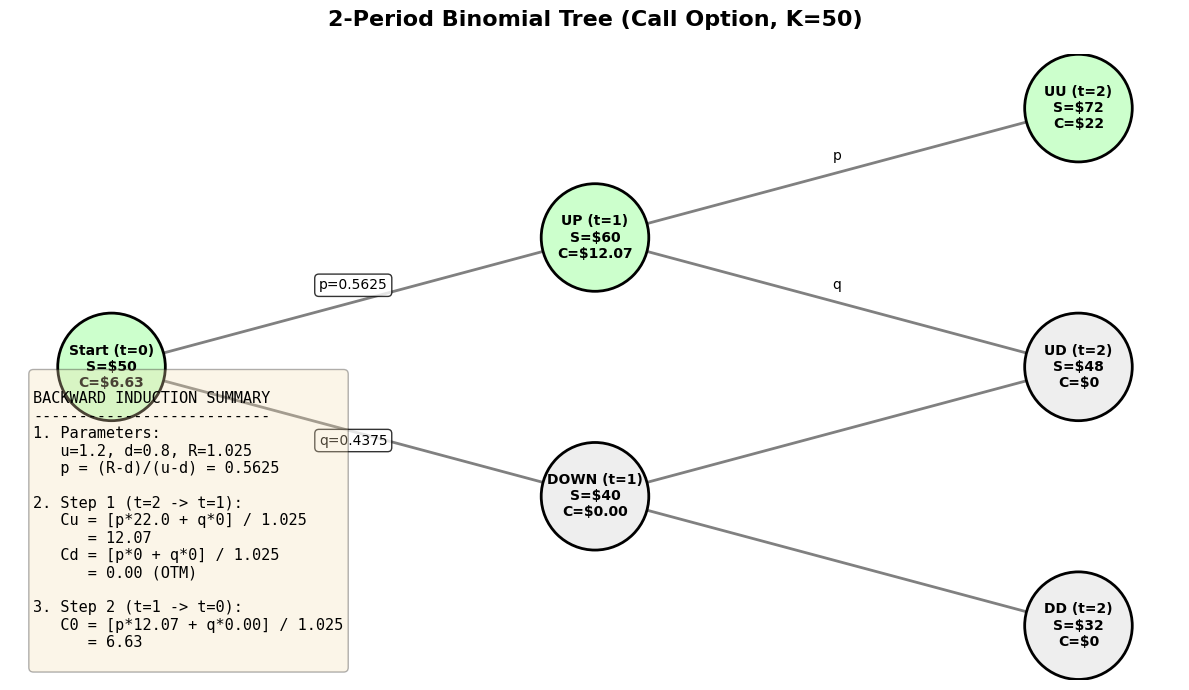

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_two_period_tree():
    """
    Visualizes the specific 2-period example provided:
    S0=50, u=1.2, d=0.8, r=2.5% per period, K=50
    """
    # --- 1. Inputs ---
    S0 = 50
    K = 50
    u = 1.20
    d = 0.80
    r_period = 0.025
    R = 1 + r_period
    
    # --- 2. Calculations (Forward Pass - Stock Prices) ---
    # t=0
    node_0 = S0
    
    # t=1
    node_u = S0 * u
    node_d = S0 * d
    
    # t=2
    node_uu = node_u * u
    node_ud = node_u * d  # Recombining: 60 * 0.8 = 48
    node_dd = node_d * d
    
    # --- 3. Calculations (Backward Pass - Option Values) ---
    # Risk Neutral Prob
    p = (R - d) / (u - d)
    q = 1 - p
    
    # Step A: Terminal Payoffs (t=2)
    C_uu = max(node_uu - K, 0)
    C_ud = max(node_ud - K, 0)
    C_dd = max(node_dd - K, 0)
    
    # Step B: Discount to t=1
    C_u = (p * C_uu + q * C_ud) / R
    C_d = (p * C_ud + q * C_dd) / R
    
    # Step C: Discount to t=0
    C_0 = (p * C_u + q * C_d) / R
    
    # --- 4. Graph Construction ---
    G = nx.DiGraph()
    
    # Define Labels with Price and Option Value
    # Using specific formatting to match the slide
    lbl_0 = f"Start (t=0)\nS=${node_0:.0f}\nC=${C_0:.2f}"
    
    lbl_u = f"UP (t=1)\nS=${node_u:.0f}\nC=${C_u:.2f}"
    lbl_d = f"DOWN (t=1)\nS=${node_d:.0f}\nC=${C_d:.2f}"
    
    lbl_uu = f"UU (t=2)\nS=${node_uu:.0f}\nC=${C_uu:.0f}"
    lbl_ud = f"UD (t=2)\nS=${node_ud:.0f}\nC=${C_ud:.0f}"
    lbl_dd = f"DD (t=2)\nS=${node_dd:.0f}\nC=${C_dd:.0f}"
    
    # Add Edges
    G.add_edge(lbl_0, lbl_u)
    G.add_edge(lbl_0, lbl_d)
    
    G.add_edge(lbl_u, lbl_uu)
    G.add_edge(lbl_u, lbl_ud)
    
    G.add_edge(lbl_d, lbl_ud) # Recombining node
    G.add_edge(lbl_d, lbl_dd)
    
    # Position nodes manually for a clean tree structure
    # (x=time, y=price_rank)
    pos = {
        lbl_0:  (0, 0),
        lbl_u:  (1, 1),
        lbl_d:  (1, -1),
        lbl_uu: (2, 2),
        lbl_ud: (2, 0),
        lbl_dd: (2, -2)
    }
    
    # --- 5. Visualization ---
    plt.figure(figsize=(12, 7))
    
    # Draw Nodes
    # Color logic: Green for positive option value, Gray for zero (OTM)
    colors = []
    for node_c in [C_0, C_u, C_d, C_uu, C_ud, C_dd]:
        colors.append('#ccffcc' if node_c > 0.01 else '#eeeeee')
        
    nx.draw_networkx_nodes(G, pos, node_size=6000, node_color=colors, 
                           edgecolors='black', linewidths=2)
    
    # Draw Edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=2)
    
    # Draw Labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    # Add Probability Annotations
    # t=0 to t=1
    plt.text(0.5, 0.6, f"p={p:.4f}", ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.text(0.5, -0.6, f"q={q:.4f}", ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # t=1 to t=2 (Upper branch)
    plt.text(1.5, 1.6, f"p", ha='center', fontsize=10)
    plt.text(1.5, 0.6, f"q", ha='center', fontsize=10)

    # Title and manual math summary box
    plt.title("2-Period Binomial Tree (Call Option, K=50)", fontsize=16, fontweight='bold', pad=20)
    
    # Add the Backward Induction Calculation Text box
    summary_text = f"""
BACKWARD INDUCTION SUMMARY
--------------------------
1. Parameters:
   u={u}, d={d}, R={R}
   p = (R-d)/(u-d) = {p:.4f}

2. Step 1 (t=2 -> t=1):
   Cu = [p*{C_uu} + q*{C_ud}] / {R}
      = {C_u:.2f}
   Cd = [p*{C_ud} + q*{C_dd}] / {R}
      = {C_d:.2f} (OTM)

3. Step 2 (t=1 -> t=0):
   C0 = [p*{C_u:.2f} + q*{C_d:.2f}] / {R}
      = {C_0:.2f}
    """
    
    plt.text(0.02, 0.02, summary_text, transform=plt.gca().transAxes, 
             fontsize=11, family='monospace', verticalalignment='bottom',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Run the visualization
visualize_two_period_tree()

### Binomial Option Pricing Model: Two-Year Call (State Prices / Risk-Neutral)

*   The current price of Alpha Corp stock is $S_0 = 6$. In each of the next two years, the price can either go up by $2.50$ or go down by $2.00$. The stock pays no dividends. The one-year risk-free interest rate is $3\%$.
*   Calculate the price of a two-year call option with strike $K = 7$.

*   Gross risk-free return (per year): 
    $$ r = 1.03 $$

**Price Tree:**
$$
S_0 = 6 \longrightarrow 
\begin{cases}
S_u = 8.50 \longrightarrow 
\begin{cases}
S_{uu} = 11.00\\
S_{ud} = 6.50
\end{cases}\\
S_d = 4.00 \longrightarrow 
\begin{cases}
S_{du} = 6.50\\
S_{dd} = 2.00
\end{cases}
\end{cases}
$$

**Option Payoffs at $T=2$ ($K=7$):**
$$
C_{uu} = (11-7)^+ = 4,\quad 
C_{ud} = (6.5-7)^+ = 0,\quad
C_{du} = (6.5-7)^+ = 0,\quad
C_{dd} = (2-7)^+ = 0
$$

**Step 1: Value at $t=1$ (node-by-node risk-neutral probabilities)**

*   Node $u$ (current stock price $S_u=8.50$):
    *   Gross up and down returns from node $u$:
        $$
        u_u = \frac{S_{uu}}{S_u}=\frac{11}{8.5}=1.2941,\quad
        d_u = \frac{S_{ud}}{S_u}=\frac{6.5}{8.5}=0.7647
        $$
    *   Risk-neutral probability:
        $$
        p_u=\frac{r-d_u}{u_u-d_u}
        =\frac{1.03-0.7647}{1.2941-0.7647}
        =\frac{0.2653}{0.5294}
        =0.5011
        $$
    *   Backward induction:
        $$
        C_u=\frac{1}{r}\left[p_u C_{uu}+(1-p_u)C_{ud}\right]
        =\frac{1}{1.03}\left[0.5011(4)+0.4989(0)\right]
        =1.9461\ (\approx 1.95)
        $$

*   Node $d$ (current stock price $S_d=4.00$):
    *   Both terminal call payoffs from this node are zero ($C_{du}=0$, $C_{dd}=0$), hence:
        $$
        C_d = 0
        $$

**Step 2: Value at $t=0$ (risk-neutral probability at the root)**

*   Gross up and down returns from node $0$:
    $$
    u_0=\frac{S_u}{S_0}=\frac{8.5}{6}=1.4167,\quad
    d_0=\frac{S_d}{S_0}=\frac{4}{6}=0.6667
    $$
*   Risk-neutral probability:
    $$
    p_0=\frac{r-d_0}{u_0-d_0}
    =\frac{1.03-0.6667}{1.4167-0.6667}
    =\frac{0.3633}{0.7500}
    =0.4844
    $$
*   Price today:
    $$
    C_0=\frac{1}{r}\left[p_0 C_u+(1-p_0)C_d\right]
    =\frac{1}{1.03}\left[0.4844(1.9461)+0.5156(0)\right]
    =0.915\ (\approx 0.92)
    $$

---


### Binomial Option Pricing Model: Two-Year Put (State Prices / Risk-Neutral)

*   Using the same parameters for Alpha Corp, calculate the price of a two-year put option with strike $K = 7$.

*   Gross risk-free return (per year):
    $$ r = 1.03 $$

**Price Tree:**
$$
S_0 = 6 \longrightarrow 
\begin{cases}
S_u = 8.50 \longrightarrow 
\begin{cases}
S_{uu} = 11.00\\
S_{ud} = 6.50
\end{cases}\\
S_d = 4.00 \longrightarrow 
\begin{cases}
S_{du} = 6.50\\
S_{dd} = 2.00
\end{cases}
\end{cases}
$$

**Option Payoffs at $T=2$ ($K=7$):**
$$
P_{uu} = (7-11)^+ = 0,\quad 
P_{ud} = (7-6.5)^+ = 0.50,\quad
P_{du} = (7-6.5)^+ = 0.50,\quad
P_{dd} = (7-2)^+ = 5.00
$$

**Step 1: Value at $t=1$ (node-by-node risk-neutral probabilities)**

*   Node $u$ (current stock price $S_u=8.50$):
    *   Gross up and down returns from node $u$:
        $$
        u_u=\frac{11}{8.5}=1.2941,\quad
        d_u=\frac{6.5}{8.5}=0.7647
        $$
    *   Risk-neutral probability:
        $$
        p_u=\frac{r-d_u}{u_u-d_u}
        =\frac{1.03-0.7647}{1.2941-0.7647}
        =0.5011
        $$
    *   Backward induction:
        $$
        P_u=\frac{1}{r}\left[p_u P_{uu}+(1-p_u)P_{ud}\right]
        =\frac{1}{1.03}\left[0.5011(0)+0.4989(0.50)\right]
        =0.2422\ (\approx 0.24)
        $$

*   Node $d$ (current stock price $S_d=4.00$):
    *   Gross up and down returns from node $d$:
        $$
        u_d=\frac{S_{du}}{S_d}=\frac{6.5}{4}=1.6250,\quad
        d_d=\frac{S_{dd}}{S_d}=\frac{2}{4}=0.5000
        $$
    *   Risk-neutral probability:
        $$
        p_d=\frac{r-d_d}{u_d-d_d}
        =\frac{1.03-0.50}{1.6250-0.50}
        =\frac{0.53}{1.1250}
        =0.4711
        $$
    *   Backward induction:
        $$
        P_d=\frac{1}{r}\left[p_d P_{du}+(1-p_d)P_{dd}\right]
        =\frac{1}{1.03}\left[0.4711(0.50)+0.5289(5.00)\right]
        =2.796\ (\approx 2.80)
        $$

**Step 2: Value at $t=0$ (risk-neutral probability at the root)**

*   Gross up and down returns from node $0$:
    $$
    u_0=\frac{8.5}{6}=1.4167,\quad
    d_0=\frac{4}{6}=0.6667
    $$
*   Risk-neutral probability:
    $$
    p_0=\frac{r-d_0}{u_0-d_0}
    =\frac{1.03-0.6667}{1.4167-0.6667}
    =0.4844
    $$
*   Price today:
    $$
    P_0=\frac{1}{r}\left[p_0 P_u+(1-p_0)P_d\right]
    =\frac{1}{1.03}\left[0.4844(0.2422)+0.5156(2.796)\right]
    =1.513\ (\approx 1.51)
    $$

---


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets
from IPython.display import display

def additive_binomial_tree(S0, K, up_amt, down_amt, r_pct, option_type):
    """
    Visualizes the 2-Period Additive Binomial Model with CLEAN formatting.
    """
    # --- 1. Setup & Forward Pass (Stock Prices) ---
    r = 1 + r_pct / 100.0
    
    # t=0
    S_root = S0
    
    # t=1
    S_u = S_root + up_amt
    S_d = S_root - down_amt
    
    # t=2
    S_uu = S_u + up_amt
    S_ud = S_u - down_amt
    S_du = S_d + up_amt   
    S_dd = S_d - down_amt
    
    # --- 2. Backward Induction ---
    
    def solve_node(S_curr, S_up, S_down, V_up, V_down):
        u_local = S_up / S_curr
        d_local = S_down / S_curr
        
        if (u_local - d_local) == 0:
            p = 0
        else:
            p = (r - d_local) / (u_local - d_local)
        q = 1 - p
        
        val = (p * V_up + q * V_down) / r
        return p, q, val

    # Step A: Terminal Payoffs (t=2)
    if option_type == 'Call':
        V_uu = max(S_uu - K, 0)
        V_ud = max(S_ud - K, 0)
        V_dd = max(S_dd - K, 0)
    else: # Put
        V_uu = max(K - S_uu, 0)
        V_ud = max(K - S_ud, 0)
        V_dd = max(K - S_dd, 0)

    # Step B: Value at t=1
    p_u, q_u, V_u = solve_node(S_u, S_uu, S_ud, V_uu, V_ud)
    p_d, q_d, V_d = solve_node(S_d, S_du, S_dd, V_ud, V_dd)
    
    # Step C: Value at t=0
    p_0, q_0, V_0 = solve_node(S_root, S_u, S_d, V_u, V_d)
    
    # --- 3. Visualization ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # --- LEFT PANEL: Tree ---
    G = nx.DiGraph()
    
    # Rounded labels for tree nodes
    lbl_0 = f"t=0\nS=${S_root:.2f}\nV=${V_0:.2f}"
    lbl_u = f"UP (t=1)\nS=${S_u:.2f}\nV=${V_u:.2f}"
    lbl_d = f"DOWN (t=1)\nS=${S_d:.2f}\nV=${V_d:.2f}"
    lbl_uu = f"UU (t=2)\nS=${S_uu:.2f}\nPay=${V_uu:.2f}"
    lbl_ud = f"UD (t=2)\nS=${S_ud:.2f}\nPay=${V_ud:.2f}"
    lbl_dd = f"DD (t=2)\nS=${S_dd:.2f}\nPay=${V_dd:.2f}"
    
    G.add_edge(lbl_0, lbl_u); G.add_edge(lbl_0, lbl_d)
    G.add_edge(lbl_u, lbl_uu); G.add_edge(lbl_u, lbl_ud)
    G.add_edge(lbl_d, lbl_ud); G.add_edge(lbl_d, lbl_dd)
    
    pos = {lbl_0: (0, 0), lbl_u: (1, 1), lbl_d: (1, -1), lbl_uu: (2, 2), lbl_ud: (2, 0), lbl_dd: (2, -2)}
    colors = ['#ccffcc' if v > 0.01 else '#eeeeee' for v in [V_0, V_u, V_d, V_uu, V_ud, V_dd]]
    
    nx.draw_networkx_nodes(G, pos, node_size=6000, node_color=colors, edgecolors='black', linewidths=2, ax=ax1)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=2, ax=ax1)
    nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', ax=ax1)
    
    ax1.text(0.5, 0.6, f"p={p_0:.3f}", ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white'))
    ax1.text(0.5, -0.6, f"p_d (implied)\n{1-p_0:.3f}", ha='center', fontsize=9, alpha=0.7)
    ax1.text(1.5, 1.6, f"p={p_u:.3f}", ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white'))
    ax1.text(1.5, -1.4, f"p={p_d:.3f}", ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white'))
    ax1.set_title(f"Additive Tree: {option_type} Option (K=${K})", fontsize=14, fontweight='bold')
    ax1.axis('off')
    
    # --- RIGHT PANEL: Clean Logic Text ---
    ax2.axis('off')
    
    # We force formatting inside the f-string (e.g., :.2f for prices, :.4f for rates)
    summary_text = f"""
CALCULATION LOGIC ({option_type.upper()})
========================================
Parameters:
S0=${S0:.2f}, K={K}, r={r:.2f} (Gross)
Moves: +{up_amt:.2f} / -{down_amt:.2f}

STEP 1: NODE-BY-NODE PROBABILITIES (t=1)
----------------------------------------
** Node Up (S={S_u:.2f}) **
   u_local = {S_uu:.2f}/{S_u:.2f} = {S_uu/S_u:.4f}
   d_local = {S_ud:.2f}/{S_u:.2f} = {S_ud/S_u:.4f}
   p_u = ({r:.2f} - d) / (u - d) = {p_u:.4f}
   
   V_u = (p_u * {V_uu:.2f} + q_u * {V_ud:.2f}) / {r:.2f}
       = ${V_u:.4f}

** Node Down (S={S_d:.2f}) **
   u_local = {S_du:.2f}/{S_d:.2f} = {S_du/S_d:.4f}
   d_local = {S_dd:.2f}/{S_d:.2f} = {S_dd/S_d:.4f}
   p_d = ({r:.2f} - d) / (u - d) = {p_d:.4f}

   V_d = (p_d * {V_ud:.2f} + q_d * {V_dd:.2f}) / {r:.2f}
       = ${V_d:.4f}

STEP 2: ROOT CALCULATION (t=0)
----------------------------------------
** Root (S={S_root:.2f}) **
   u_0 = {S_u:.2f}/{S_root:.2f} = {S_u/S_root:.4f}
   d_0 = {S_d:.2f}/{S_root:.2f} = {S_d/S_root:.4f}
   p_0 = ({r:.2f} - d) / (u - d) = {p_0:.4f}

   V_0 = (p_0 * {V_u:.4f} + q_0 * {V_d:.4f}) / {r:.2f}
       = ${V_0:.4f}
    """
    
    ax2.text(0.02, 0.98, summary_text, transform=ax2.transAxes, fontsize=11, 
             verticalalignment='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.2))
    
    plt.tight_layout()
    plt.show()

# --- Widgets ---
style = {'description_width': '100px'}

type_w = widgets.Dropdown(options=['Call', 'Put'], value='Call', description='Option Type:', style=style)
s0_w = widgets.FloatSlider(value=6.0, min=1, max=20, step=0.5, description='Spot (S0):', style=style)
k_w = widgets.FloatSlider(value=7.0, min=1, max=20, step=0.5, description='Strike (K):', style=style)
r_w = widgets.FloatSlider(value=3.0, min=0, max=10, step=0.1, description='Rate %:', style=style)
up_w = widgets.FloatSlider(value=2.50, min=0.5, max=5.0, step=0.25, description='Up Amt (+):', style=style)
down_w = widgets.FloatSlider(value=2.00, min=0.5, max=5.0, step=0.25, description='Down Amt (-):', style=style)

ui = widgets.VBox([
    widgets.HBox([type_w, r_w]),
    widgets.HBox([s0_w, k_w]),
    widgets.HBox([up_w, down_w]),
    widgets.interactive_output(additive_binomial_tree, {
        'S0': s0_w, 'K': k_w, 'r_pct': r_w,
        'up_amt': up_w, 'down_amt': down_w,
        'option_type': type_w
    })
])

display(ui)

### Binomial Option Pricing Model

*   **Derivative:** 2-year European put option with a strike price of $105.
*   **Parameters:** Stock starts at $100, goes up or down by 10% each year, $r=2\%$.

**Price Tree:**
$$ S_0 = 100 \longrightarrow \begin{cases} S_u = 110 \longrightarrow \begin{cases} S_{uu} = 121 \\ S_{ud} = 99 \end{cases} \\ S_d = 90 \longrightarrow \begin{cases} S_{du} = 99 \\ S_{dd} = 81 \end{cases} \end{cases} $$

**Option Payoffs ($T=2, K=105$):**
$$ P_{uu}=0, \quad P_{ud}=6, \quad P_{dd}=24 $$

**Backward Induction:**
$$ P_1^u = \frac{(1.02 - 0.90) \times 0 - (1.02 - 1.10) \times 6}{1.02(1.10 - 0.90)} = \$2.35 $$
$$ P_1^d = \frac{(1.02 - 0.90) \times 6 - (1.02 - 1.10) \times 24}{1.02(1.10 - 0.90)} = \$12.94 $$
$$ P_0 = \frac{(1.02 - 0.90) \times 2.35 - (1.02 - 1.10) \times 12.94}{1.02(1.10 - 0.90)} = \$6.47 $$

---

### Binomial Option Pricing Model

*   **Derivative:** 2-year **American put option** with a strike price of $105.
*   **Parameters:** Stock starts at $100, goes up or down by 10% each year, $r=2\%$.

**Value Tree with Early Exercise Check:**
*   At T=1, Node D ($S=90$): Intrinsic Value ($105-90=15$) > European Value ($12.94$). 
$$
P_0 = 7.27 \longrightarrow \begin{cases} P_u = 2.35 \longrightarrow \begin{cases} P_{uu} = 0 \\ P_{ud} = 6 \end{cases} \\ P_d = 15 \text{ (Exercise)} \longrightarrow \begin{cases} P_{du} = 6 \\ P_{dd} = 24 \end{cases} \end{cases}
$$

**Calculations:**
$$ P_1^u = \$2.35 $$
$$ P_1^d = \max(\$12.94, \$15.00) = \$15.00 $$
$$ P_0 = \frac{(1.02 - 0.90) \times 2.35 - (1.02 - 1.10) \times 15}{1.02(1.10 - 0.90)} = \$7.27 $$

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets
from IPython.display import display

def visualize_euro_vs_amer_interactive(S0, K, u_pct, d_pct, r_pct, option_style):
    """
    Interactive comparison of European vs American Puts.
    STRICT DECIMAL FORMATTING applied to summary text.
    """
    # --- 1. Setup Calculations ---
    u = 1 + u_pct / 100.0
    d = 1 + d_pct / 100.0
    r = 1 + r_pct / 100.0  # Gross rate (per period)
    
    # Risk Neutral Probability
    # Check for arbitrage
    if u <= d or r <= d or r >= u:
        p = 0.5 # Fallback to prevent crash during slider drag
        valid_model = False
    else:
        p = (r - d) / (u - d)
        valid_model = True
    q = 1 - p
    
    # --- 2. Build Tree Nodes (Forward Pass) ---
    S_0 = S0
    S_u = S0 * u
    S_d = S0 * d
    S_uu = S_u * u
    S_ud = S_u * d
    S_dd = S_d * d
    
    # --- 3. Valuation (Backward Pass) ---
    
    def get_intrinsic(S):
        return max(K - S, 0)
    
    # Step A: Terminal Payoffs (t=2)
    P_uu = get_intrinsic(S_uu)
    P_ud = get_intrinsic(S_ud)
    P_dd = get_intrinsic(S_dd)
    
    # Step B: Valuation at t=1
    
    # -- Node Up --
    val_cont_u = (p * P_uu + q * P_ud) / r
    val_intr_u = get_intrinsic(S_u)
    
    if option_style == 'American':
        exercise_u = val_intr_u > val_cont_u + 0.0001
        P_u = val_intr_u if exercise_u else val_cont_u
    else:
        exercise_u = False
        P_u = val_cont_u

    # -- Node Down --
    val_cont_d = (p * P_ud + q * P_dd) / r
    val_intr_d = get_intrinsic(S_d)
    
    if option_style == 'American':
        exercise_d = val_intr_d > val_cont_d + 0.0001
        P_d = val_intr_d if exercise_d else val_cont_d
    else:
        exercise_d = False
        P_d = val_cont_d
        
    # Step C: Valuation at t=0
    val_cont_0 = (p * P_u + q * P_d) / r
    val_intr_0 = get_intrinsic(S_0)
    
    if option_style == 'American':
        P_0 = max(val_cont_0, val_intr_0)
    else:
        P_0 = val_cont_0

    # --- 4. Visualization ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # --- LEFT PANEL: Tree ---
    G = nx.DiGraph()
    
    # Labels (already formatted correctly in graph, but good to check)
    lbl_0 = f"t=0\nS=${S_0:.2f}\nP=${P_0:.2f}"
    lbl_u = f"UP (t=1)\nS=${S_u:.2f}\nP=${P_u:.2f}"
    if exercise_u: lbl_u += "\n(EXERCISE)"
    
    lbl_d = f"DOWN (t=1)\nS=${S_d:.2f}\nP=${P_d:.2f}"
    if exercise_d: lbl_d += "\n(EXERCISE)"
    
    lbl_uu = f"UU (t=2)\nS=${S_uu:.2f}\nPay=${P_uu:.2f}"
    lbl_ud = f"UD (t=2)\nS=${S_ud:.2f}\nPay=${P_ud:.2f}"
    lbl_dd = f"DD (t=2)\nS=${S_dd:.2f}\nPay=${P_dd:.2f}"
    
    G.add_edge(lbl_0, lbl_u); G.add_edge(lbl_0, lbl_d)
    G.add_edge(lbl_u, lbl_uu); G.add_edge(lbl_u, lbl_ud)
    G.add_edge(lbl_d, lbl_ud); G.add_edge(lbl_d, lbl_dd)
    
    pos = {lbl_0: (0, 0), lbl_u: (1, 1), lbl_d: (1, -1), lbl_uu: (2, 2), lbl_ud: (2, 0), lbl_dd: (2, -2)}
    
    node_colors = []
    for node in G.nodes():
        if "(EXERCISE)" in node:
            node_colors.append('#ffcccc')
        elif "Pay=$0" in node or "P=$0.00" in node:
            node_colors.append('#eeeeee')
        else:
            node_colors.append('#ccffcc')
            
    nx.draw_networkx_nodes(G, pos, node_size=6500, node_color=node_colors, edgecolors='black', linewidths=2, ax=ax1)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=2, ax=ax1)
    nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', ax=ax1)
    
    if not valid_model:
        ax1.text(0, 0, "INVALID PARAMETERS\n(Arbitrage: d < r < u violated)", fontsize=20, color='red', ha='center', bbox=dict(facecolor='white'))
    else:
        ax1.text(0.5, 0.6, f"p={p:.3f}", ha='center', bbox=dict(boxstyle='round', facecolor='white'))
        ax1.text(0.5, -0.6, f"q={q:.3f}", ha='center', bbox=dict(boxstyle='round', facecolor='white'))
    
    ax1.set_title(f"Tree: {option_style} Put (K=${K})", fontsize=14, fontweight='bold')
    ax1.axis('off')
    
    # --- RIGHT PANEL: Calculation Logic ---
    ax2.axis('off')
    
    # Strict formatting for logic text
    if option_style == 'European':
        decision_d_text = f"""
   P_d = (p * P_ud + q * P_dd) / r
       = ({p:.3f} * {P_ud:.2f} + {q:.3f} * {P_dd:.2f}) / {r:.3f}
       = ${val_cont_d:.2f}
        """
    else:
        decision_d_text = f"""
   1. Continuation Value (Euro):
      V_cont = ({p:.3f}*{P_ud:.2f} + {q:.3f}*{P_dd:.2f}) / {r:.3f}
             = ${val_cont_d:.2f}
   
   2. Intrinsic Value (Now):
      V_intr = K - S_d = {K:.2f} - {S_d:.2f}
             = ${val_intr_d:.2f}
   
   3. Decision:
      Max(Cont, Intr) = ${P_d:.2f}
      {"--> EXERCISE!" if exercise_d else "--> HOLD"}
        """

    summary_text = f"""
CALCULATION LOGIC ({option_style.upper()})
========================================
Parameters:
S0={S0:.2f}, K={K:.2f}, r={r_pct:.2f}%
u={u:.2f} (+{u_pct:.2f}%), d={d:.2f} ({d_pct:.2f}%)
Risk-Neutral p = {p:.4f}

ANALYSIS OF DOWN NODE (S={S_d:.2f})
----------------------------------------
{decision_d_text}

FINAL ROOT PRICE (t=0)
----------------------------------------
P_0 = (p * P_u + q * P_d) / r
    = ({p:.3f} * {P_u:.2f} + {q:.3f} * {P_d:.2f}) / {r:.3f}
    = ${P_0:.2f}
    """
    
    ax2.text(0.02, 0.98, summary_text, transform=ax2.transAxes, fontsize=11, 
             verticalalignment='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.2))
    
    plt.tight_layout()
    plt.show()

# --- Widgets ---
style = {'description_width': '100px'}

style_w = widgets.Dropdown(options=['European', 'American'], value='American', description='Option Style:', style=style)

s0_w = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Spot (S0):', style=style)
k_w = widgets.FloatSlider(value=105, min=50, max=150, step=1, description='Strike (K):', style=style)
r_w = widgets.FloatSlider(value=2.0, min=0, max=10, step=0.1, description='Rate %:', style=style)

u_w = widgets.FloatSlider(value=10, min=1, max=50, step=1, description='Up %:', style=style)
d_w = widgets.FloatSlider(value=-10, min=-50, max=-1, step=1, description='Down %:', style=style)

# Layout
ui = widgets.VBox([
    widgets.HBox([style_w, r_w]),
    widgets.HBox([s0_w, k_w]),
    widgets.HBox([u_w, d_w]),
    widgets.interactive_output(visualize_euro_vs_amer_interactive, {
        'S0': s0_w, 'K': k_w, 
        'u_pct': u_w, 'd_pct': d_w, 'r_pct': r_w,
        'option_style': style_w
    })
])

display(ui)

### Black-Scholes Option Pricing Model
* Key assumptions
  
  * There are no arbitrage opportunities.
  
  * Underlying asset is a traded security, and investors can trade continuously.
  
  * The option to be priced is European.
  
  * Constant volatility (equal u and d moves through the tree), with no jumps.
  
  * No transaction costs or taxes, securities perfectly divisible, no portfolio restrictions, investors are price-takers.

* Continuous trading assumption
  
  * When markets are open, we can trade as we wish, so it is a good approximation.
  
  * But markets do close, so continuous trading is not ideal.

---





### Black-Scholes Option Pricing Model

**Black-Scholes Price of a Call Option on a Non-Dividend-Paying Stock**
$$ C_t = S_t \times N(d_1) - PV(K) \times N(d_2) $$

$\quad\text{where:} $

$$ d_1 = \frac{\ln(S_t/PV(K))}{\sigma\sqrt{T-t}} + \frac{\sigma\sqrt{T-t}}{2} $$
$$ d_2 = d_1 - \sigma\sqrt{T-t} $$

**Black-Scholes Price of a Put Option on a Non-Dividend-Paying Stock**

$$
P_t = PV(K)[1 - N(d_2)] - S_t[1 - N(d_1)]
$$

**Default Notation**

* $\mathbf{S_t}$ : Value of the underlying asset at date $t$;
* $\mathbf{K}$ : Strike price of the option;
* $\mathbf{r_f}$ : Risk-free rate (annual terms);
* $\mathbf{\sigma}$ : Volatility (in annual terms), i.e. squared root of the variance;
* $\mathbf{T}$ : Maturity, so at date $t$, $T - t$ is time to maturity.
* $\mathbf{N(d)}$ : The cumulative normal distribution
---



### Black-Scholes Option Pricing Model

**Black-Scholes Price of a Call Option on a Non-Dividend-Paying Stock**
$$ C_t = S_t \times N(d_1) - PV(K) \times N(d_2) \quad \text{where} $$
$$ d_1 = \frac{\ln(S_t/PV(K))}{\sigma\sqrt{T-t}} + \frac{\sigma\sqrt{T-t}}{2} $$
$$ d_2 = d_1 - \sigma\sqrt{T-t} $$

**Black-Scholes Price of a Put Option on a Non-Dividend-Paying Stock**
$$ P_t = PV(K)[1 - N(d_2)] - S_t[1 - N(d_1)] $$

* The value of a call is a weighted difference of the present value of its potential benefits, $S_t$, and the present value of its potential costs $PV(K)$ where the weights $N(d_1)$ and $N(d_1 - \sigma\sqrt{T-t})$ are in $(0, 1)$.

* The value of a put is a weighted difference of the present value of its potential costs $PV(K)$, and the present value of its potential benefits, $S_t$, where the weights $[1 - N(d_2)]$ and $[1 - N(d_1)]$ are in $(0, 1)$.

$$ C_t = \underbrace{S_t \times N(d_1)}_{\Delta} - \underbrace{PV(K) \times N(d_2)}_{\text{Borrowing}} \implies C_t = \text{Asset Price} \times \text{Delta} + \text{Cash Position} $$

---



### Black-Scholes Option Pricing Model

* The cumulative normal distribution [$N(d)$]
  * The probability that a normally distributed random variable will take on a value less than d.
  
  * Equal to the area under the normal distribution to the left of the point d.
  
  * $N(d)$ has a minimum value of 0 and a maximum value of 1.
  
  * Can be calculated in Excel using the function NORMSDIST(d).

$$ d_1 = \frac{\ln(S_t/PV(K))}{\sigma\sqrt{T-t}} + \frac{\sigma\sqrt{T-t}}{2} $$
$$ d_2 = d_1 - \sigma\sqrt{T-t} $$

* Volatility (standard deviation) follows the squared-root rule.
  * Monthly volatility is $\sigma_m$, then the annual volatility is $\sigma_a = \sqrt{12}\sigma_m$
  
  * Weekly volatility is $\sigma_w$, then the annual volatility is $\sigma_a = \sqrt{52}\sigma_w$
  
  * Daily volatility is $\sigma_d$, then the annual volatility is $\sigma_a = \sqrt{250}\sigma_d$

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
import ipywidgets as widgets
from IPython.display import display

def explain_d1_d2(S, K, T, r_pct, sigma_pct):
    """
    Visualizes d1 and d2 on the Standard Normal Distribution.
    """
    # --- 1. Calculations ---
    r = r_pct / 100.0
    sigma = sigma_pct / 100.0
    
    # Avoid division by zero
    if T <= 0 or sigma <= 0:
        print("Time and Volatility must be > 0")
        return

    # PV(K) as per slide
    PV_K = K * np.exp(-r * T)
    
    # Calculate d1 and d2 (Using the slide's variation of the formula)
    # Term 1: ln(S / PV(K)) / (sigma * sqrt(T))
    numerator = np.log(S / PV_K)
    denominator = sigma * np.sqrt(T)
    term1 = numerator / denominator
    
    # Term 2: sigma * sqrt(T) / 2
    term2 = denominator / 2
    
    d1 = term1 + term2
    d2 = d1 - denominator  # d2 = d1 - sigma*sqrt(T)
    
    # Cumulative Probabilities N(d)
    Nd1 = si.norm.cdf(d1)
    Nd2 = si.norm.cdf(d2)
    
    # Option Price (Black-Scholes Call for context)
    call_price = S * Nd1 - PV_K * Nd2

    # --- 2. Visualization ---
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # X-axis for the bell curve (Standard Normal: mean=0, std=1)
    x = np.linspace(-4, 4, 1000)
    y = si.norm.pdf(x)
    
    # Plot the bell curve
    ax.plot(x, y, 'k-', lw=2, label='Normal Distribution PDF')
    ax.fill_between(x, y, alpha=0.1, color='gray')
    
    # Plot d1 line and Area N(d1)
    ax.axvline(d1, color='blue', linestyle='--', linewidth=2, label=f'd1 = {d1:.2f}')
    # We only shade N(d2) to keep it clean, but we mark d1
    
    # Plot d2 line and Area N(d2)
    ax.axvline(d2, color='red', linestyle='--', linewidth=2, label=f'd2 = {d2:.2f}')
    ax.fill_between(x, y, where=(x <= d2), color='red', alpha=0.3, label=f'N(d2) = {Nd2:.1%}')
    
    # Annotate the "Volatility Gap"
    mid_point_y = max(y) * 0.6
    if abs(d1 - d2) > 0.1: # Only draw arrow if gap is visible
        ax.annotate('', xy=(d1, mid_point_y), xytext=(d2, mid_point_y),
                    arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
        ax.text((d1+d2)/2, mid_point_y + 0.02, r'$\sigma\sqrt{T}$', 
                color='purple', ha='center', fontsize=12, fontweight='bold')

    # Formatting
    ax.set_title(f"Visualizing d1 and d2 (Gap = Volatility * Time)", fontsize=16)
    ax.set_xlabel("Standard Deviations (z-score)")
    ax.set_ylim(0, max(y)*1.1)
    ax.legend(loc='upper left')
    
    # --- 3. Explanation Text ---
    
    # Calculate Volatility Conversions for the footer
    vol_monthly = sigma / np.sqrt(12)
    vol_weekly = sigma / np.sqrt(52)
    vol_daily = sigma / np.sqrt(250)
    
    summary_text = f"""
CALCULATION BREAKDOWN
=====================
1. The Gap (Volatility Effect):
   σ * √T = {sigma:.2f} * {np.sqrt(T):.2f} = {denominator:.4f}
   Therefore: d2 = d1 - {denominator:.4f}

2. d2 (Probability of Exercise):
   d2 = {d2:.4f}
   N(d2) = {Nd2:.4f} ({Nd2:.1%})
   -> "Probability the option finishes ITM" (Risk-Neutral)

3. d1 (Hedge Ratio Component):
   d1 = {d1:.4f}
   N(d1) = {Nd1:.4f} ({Nd1:.1%})
   -> "Delta" (Sensitivity to stock price)

4. Volatility Scaling Rules (Based on Annual {sigma:.1%}):
   Monthly = {sigma:.1%} / √12 = {vol_monthly:.2%}
   Weekly  = {sigma:.1%} / √52 = {vol_weekly:.2%}
   Daily   = {sigma:.1%} / √250 = {vol_daily:.2%}
    """
    
    # Place text on the plot or to the side? Let's print it below for clarity
    plt.show()
    print(summary_text)

# --- Widgets ---
style = {'description_width': 'initial'}

s_w = widgets.FloatSlider(value=50, min=10, max=100, description='Stock (S):', style=style)
k_w = widgets.FloatSlider(value=50, min=10, max=100, description='Strike (K):', style=style)
t_w = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, description='Time (T years):', style=style)
r_w = widgets.FloatSlider(value=5.0, min=0, max=20, step=0.5, description='Risk-Free Rate (%):', style=style)
sig_w = widgets.FloatSlider(value=20.0, min=5, max=100, step=1, description='Volatility (%):', style=style)

ui = widgets.VBox([
    widgets.HBox([s_w, k_w, t_w]),
    widgets.HBox([r_w, sig_w]),
    widgets.interactive_output(explain_d1_d2, {
        'S': s_w, 'K': k_w, 'T': t_w, 
        'r_pct': r_w, 'sigma_pct': sig_w
    })
])

display(ui)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
import ipywidgets as widgets
from IPython.display import display

def black_scholes_plot(K, T, r_pct, sigma_pct):
    """
    Plots Black-Scholes Option Prices vs. Intrinsic Payoffs.
    Replicates the 'hockey stick' payoff diagrams with time value curves.
    """
    # --- 1. Setup ---
    r = r_pct / 100.0
    sigma = sigma_pct / 100.0
    
    # Define a range of Stock Prices (S) to plot
    # We go from 50% to 150% of Strike Price to see the whole shape
    S = np.linspace(max(0.1, K * 0.5), K * 1.6, 200)
    
    # --- 2. Black-Scholes Calculations ---
    
    def bs_price(S, K, T, r, sigma, option_type):
        # Prevent division by zero if T or sigma are very close to 0
        if T <= 1e-5 or sigma <= 1e-5:
            # At T=0, price is just intrinsic value
            if option_type == 'call':
                return np.maximum(S - K, 0)
            else:
                return np.maximum(K - S, 0)
                
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        
        if option_type == 'call':
            price = (S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2))
        else: # put
            price = (K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1))
        return price

    # Calculate Values
    call_prices = bs_price(S, K, T, r, sigma, 'call')
    put_prices = bs_price(S, K, T, r, sigma, 'put')
    
    # Calculate Payoffs (Intrinsic Value at Expiration)
    call_payoff = np.maximum(S - K, 0)
    put_payoff = np.maximum(K - S, 0)

    # --- 3. Visualization ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot Call Option (Left)
    ax1.plot(S, call_prices, 'k-', lw=2, label='Black-Scholes Price')
    # FIX: Use linestyle='--' explicitly instead of 'k-.' to avoid color conflict
    ax1.plot(S, call_payoff, linestyle='--', lw=1.5, color='gray', label='Payoff at Expiry')
    
    ax1.set_title("Black-Scholes Call Option Price", fontsize=16, fontweight='bold', pad=15)
    ax1.set_xlabel("Underlying Asset Value ($S_t$)")
    ax1.set_ylabel("Option Value")
    ax1.legend(loc='upper left')
    ax1.grid(True, linestyle=':', alpha=0.6)
    
    # Plot Put Option (Right)
    ax2.plot(S, put_prices, 'k-', lw=2, label='Black-Scholes Price')
    # FIX: Use linestyle='--' explicitly instead of 'k-.' to avoid color conflict
    ax2.plot(S, put_payoff, linestyle='--', lw=1.5, color='gray', label='Payoff at Expiry')
    
    ax2.set_title("Black-Scholes Put Option Price", fontsize=16, fontweight='bold', pad=15)
    ax2.set_xlabel("Underlying Asset Value ($S_t$)")
    ax2.set_ylabel("Option Value")
    ax2.legend(loc='upper right')
    ax2.grid(True, linestyle=':', alpha=0.6)
    
    # Fill "Time Value" Area
    ax1.fill_between(S, call_payoff, call_prices, color='blue', alpha=0.1, label='Time Value')
    ax2.fill_between(S, put_payoff, put_prices, color='red', alpha=0.1, label='Time Value')

    plt.tight_layout()
    plt.show()

# --- Widgets ---
style = {'description_width': 'initial'}

k_w = widgets.FloatSlider(value=100, min=50, max=200, step=5, description='Strike (K):', style=style)
t_w = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.25, description='Time to Maturity (T years):', style=style)
r_w = widgets.FloatSlider(value=5.0, min=0, max=20, step=0.5, description='Risk-Free Rate (%):', style=style)
sig_w = widgets.FloatSlider(value=20.0, min=1, max=100, step=1, description='Volatility (%):', style=style)

ui = widgets.VBox([
    widgets.HBox([k_w, t_w]),
    widgets.HBox([r_w, sig_w]),
    widgets.interactive_output(black_scholes_plot, {
        'K': k_w, 
        'T': t_w, 
        'r_pct': r_w, 
        'sigma_pct': sig_w
    })
])

display(ui)

### Black-Scholes Option Pricing Model
* Only non-observable variable in Black-Scholes Model is volatility($\sigma$).
  
  * One option is to use historical data on daily stock returns to estimate the volatility of the stock over the past several months.
  
  * Implied volatility
    
    * The Black-Scholes formula can be expressed as $C_t = C(S_t, K, r_f, T, \sigma)$
    
    * If we know the price of a given option $C_t$, we can solve the Black-Scholes formula for $\sigma$.
    
    * In this case, $\sigma$ is called the implied volatility of the option.

---



Fetching VIX data from FRED (1990 - 2025-12-09)...


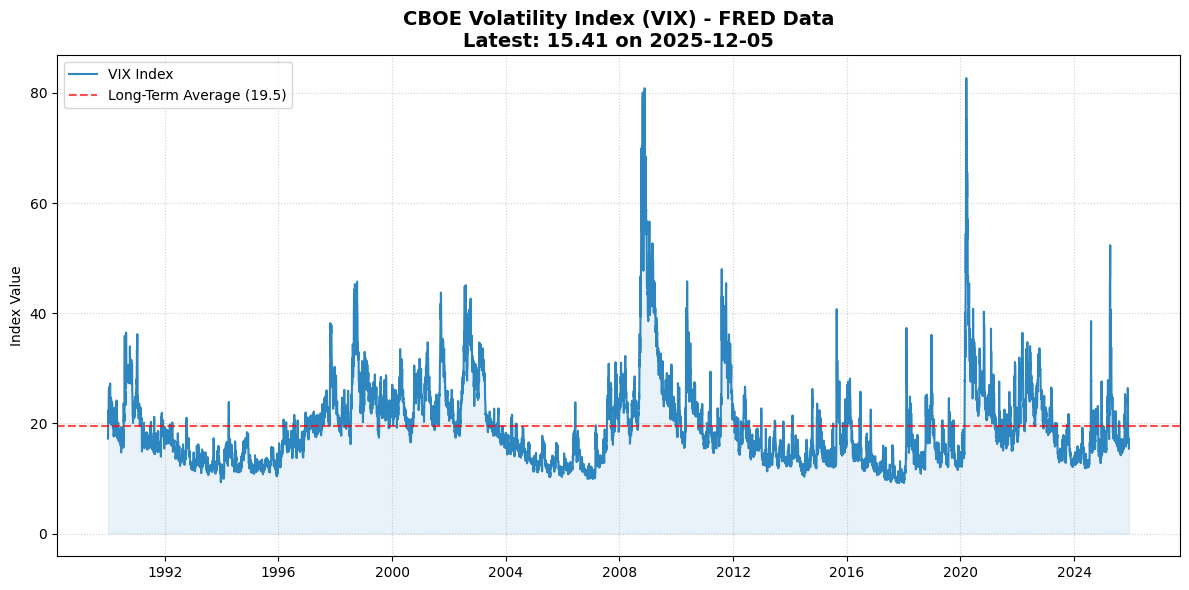

Success! Latest VIX value: 15.41 on 2025-12-05


In [12]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime

def plot_vix_from_fred():
    # 1. Define Dynamic Dates
    # Start from 1990 (typical long-term view) to "Today"
    start_date = datetime.datetime(1990, 1, 1)
    end_date = datetime.datetime.today()

    print(f"Fetching VIX data from FRED ({start_date.year} - {end_date.strftime('%Y-%m-%d')})...")

    try:
        # 2. Retrieve Data (Series ID: VIXCLS)
        vix_data = web.DataReader('VIXCLS', 'fred', start_date, end_date)
        
        # Drop NaN values (non-trading days)
        vix_data = vix_data.dropna()
        
        # Get the very latest value
        latest_date = vix_data.index[-1].strftime('%Y-%m-%d')
        latest_val = vix_data['VIXCLS'].iloc[-1]
        
        # 3. Visualization
        plt.figure(figsize=(12, 6))
        
        # Plot the main line
        plt.plot(vix_data.index, vix_data['VIXCLS'], color='#2E86C1', linewidth=1.5, label='VIX Index')
        
        # Add a horizontal line for the Long-Term Average
        long_term_avg = vix_data['VIXCLS'].mean()
        plt.axhline(long_term_avg, color='red', linestyle='--', alpha=0.7, 
                    label=f'Long-Term Average ({long_term_avg:.1f})')
        
        # Formatting
        plt.title(f'CBOE Volatility Index (VIX) - FRED Data\nLatest: {latest_val:.2f} on {latest_date}', 
                  fontsize=14, fontweight='bold')
        plt.ylabel('Index Value')
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.legend(loc='upper left')
        
        # Highlight recent period
        plt.fill_between(vix_data.index, vix_data['VIXCLS'], alpha=0.1, color='#2E86C1')

        plt.tight_layout()
        plt.show()
        
        print(f"Success! Latest VIX value: {latest_val} on {latest_date}")

    except Exception as e:
        print(f"Error fetching data: {e}")
        print("Ensure you have an internet connection and 'pandas_datareader' installed.")

# Run the function
plot_vix_from_fred()

### Black-Scholes Option Pricing Model
$$ C_t = \underbrace{S_t \times N(d_1)}_{\Delta} - \underbrace{PV(K) \times N(d_2)}_{\text{Borrowing}} $$
$$ P_t = \underbrace{PV(K) \times [1 - N(d_2)]}_{\text{Lending}} - \underbrace{[1 - N(d_1)]}_{\Delta} \times S_t $$

* The option delta, $\Delta$, is the change in the price of the option given a 1-unit change in the price of the stock.
  
  * Because $\Delta$ is always less than 1, the change in the call price is always less than the change in the stock price.
  
  * When the price of the underlying asset changes, $\Delta$ also changes.
  
  * If we can update our portfolio continuously, we can replicate an option on the stock by constantly adjusting our portfolio to remain on a line that is tangent to the value of the option.

---



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
import ipywidgets as widgets
from IPython.display import display

def visualize_replicating_portfolio(S0, K, T, r_pct, sigma_pct, option_type):
    """
    Visualizes the Black-Scholes Replicating Portfolio as a Tangent Line.
    Matches the provided textbook diagram style.
    """
    # --- 1. Setup ---
    r = r_pct / 100.0
    sigma = sigma_pct / 100.0
    
    # Range for plotting (X-axis)
    # We span widely around K to show the curve shape clearly
    x_min = 0
    x_max = K * 2.0
    S_range = np.linspace(0.1, x_max, 200) # Avoid 0 to prevent log errors
    
    # --- 2. Calculations (Vectorized for plotting) ---
    def calculate_bs(S_vals):
        # Prevent division by zero
        if T < 1e-5: return np.maximum(S_vals - K, 0) if option_type == 'Call' else np.maximum(K - S_vals, 0)
            
        d1 = (np.log(S_vals / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        
        if option_type == 'Call':
            price = S_vals * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
            intrinsic = np.maximum(S_vals - K, 0)
        else: # Put
            price = K * np.exp(-r * T) * si.norm.cdf(-d2) - S_vals * si.norm.cdf(-d1)
            intrinsic = np.maximum(K - S_vals, 0)
        return price, intrinsic

    bs_prices, intrinsic_vals = calculate_bs(S_range)
    
    # --- 3. Calculations (Specific Point S0) ---
    # We calculate the Delta and Price specifically at the user's S0 slider
    d1_0 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2_0 = d1_0 - sigma * np.sqrt(T)
    
    if option_type == 'Call':
        price_0 = S0 * si.norm.cdf(d1_0) - K * np.exp(-r * T) * si.norm.cdf(d2_0)
        delta_0 = si.norm.cdf(d1_0)
    else: # Put
        price_0 = K * np.exp(-r * T) * si.norm.cdf(-d2_0) - S0 * si.norm.cdf(-d1_0)
        delta_0 = si.norm.cdf(d1_0) - 1
        
    # Calculate Bond (B) for the replicating portfolio
    # Formula: Value = Delta * S + B  =>  B = Value - Delta * S
    B_0 = price_0 - (delta_0 * S0)
    
    # Tangent Line Equation: y = delta * x + B
    tangent_line = delta_0 * S_range + B_0

    # --- 4. Visualization ---
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # 1. Intrinsic Value (Black Line)
    ax.plot(S_range, intrinsic_vals, color='black', linewidth=2, label='Intrinsic Value')
    
    # 2. Black-Scholes Curve (Red Line)
    ax.plot(S_range, bs_prices, color='#D32F2F', linewidth=2.5, label='Black-Scholes Value')
    
    # 3. Replicating Portfolio / Tangent (Yellow/Gold Line)
    # We limit the plotting of the tangent to a reasonable range visual appeal
    ax.plot(S_range, tangent_line, color='#FBC02D', linewidth=2.5, linestyle='-', label='Replicating Portfolio (Tangent)')
    
    # 4. Current Stock Price Point
    ax.plot(S0, price_0, 'o', color='#FBC02D', markersize=8, markeredgecolor='black', zorder=10)
    ax.vlines(S0, 0, price_0, linestyles='--', colors='gray', alpha=0.5)
    ax.hlines(price_0, 0, S0, linestyles='--', colors='gray', alpha=0.5)
    
    # --- Annotations matching the slide style ---
    
    # Arrow for "Current Stock Price"
    ax.annotate('Current Stock\nPrice', xy=(S0, price_0), xytext=(S0, price_0 + (K*0.3)),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center', fontsize=11)
                
    # Text for "Replicating Portfolio"
    # Position logic: Shift text based on where the line is to avoid clutter
    text_x = S_range[len(S_range)//4] # position at 25% of x-axis
    text_y = delta_0 * text_x + B_0
    
    # Ensure text stays on screen
    if text_y < 0: 
        text_y = 1
        text_x = S0 + 5

    ax.text(S_range[40], max(0, tangent_line[40]) - (K*0.1), 
            f"Replicating Portfolio\n($\\Delta = {delta_0:.3f}, B = {B_0:.2f}$)", 
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#FBC02D", alpha=0.9))

    # Formatting
    ax.set_title(f"Black-Scholes {option_type} Option Replicating Portfolio", fontsize=16, fontweight='bold')
    ax.set_xlabel("Stock Price ($)", fontsize=12)
    ax.set_ylabel("Value ($)", fontsize=12)
    
    # Set limits to match the "textbook" look (start at 0, don't show negative value unless it's the bond intercept)
    ax.set_xlim(0, x_max)
    ax.set_ylim(-K*0.2, K*0.6) # Allow some negative y to see the tangent intercept if needed
    
    # Zero line for reference
    ax.axhline(0, color='black', linewidth=0.5)
    
    ax.legend(loc='upper left', frameon=True)
    ax.grid(True, linestyle=':', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# --- Widgets ---
style = {'description_width': 'initial'}

type_w = widgets.Dropdown(options=['Call', 'Put'], value='Call', description='Option Type:', style=style)
s0_w = widgets.FloatSlider(value=10.0, min=0.1, max=20.0, step=0.1, description='Current Price (S0):', style=style)
k_w = widgets.FloatSlider(value=10.0, min=1, max=20.0, step=0.5, description='Strike (K):', style=style)
t_w = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Time (T):', style=style)
r_w = widgets.FloatSlider(value=5.0, min=0, max=20, step=0.5, description='Risk-Free Rate (%):', style=style)
sig_w = widgets.FloatSlider(value=30.0, min=10, max=100, step=5, description='Volatility (%):', style=style)

ui = widgets.VBox([
    widgets.HBox([type_w, r_w]),
    widgets.HBox([s0_w, k_w]),
    widgets.HBox([t_w, sig_w]),
    widgets.interactive_output(visualize_replicating_portfolio, {
        'S0': s0_w, 'K': k_w, 
        'T': t_w, 'r_pct': r_w, 'sigma_pct': sig_w,
        'option_type': type_w
    })
])

display(ui)

### Black-Scholes Option Pricing Model
* Risk and Return of an Option
$$ \beta_{Option} = \frac{S_t \Delta}{S_t \Delta + B} \beta_S + \frac{B}{S_t \Delta + B} \beta_B $$
$$ \text{Since } \beta_B = 0, \quad \beta_{Option} = \frac{S_t \Delta}{S_t \Delta + B} \beta_S $$
$$ \frac{S_t \Delta}{S_t \Delta + B} \text{ is the options leverage ratio.} $$


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
import ipywidgets as widgets
from IPython.display import display

def visualize_risk_return(S0, K, T, r_pct, sigma_pct, beta_s, erm_pct, option_type):
    """
    Visualizes Option Leverage (Omega) and the Security Market Line (SML).
    - Corrects formatting issues.
    - Handles Negative Beta/Return for Puts correctly.
    """
    # --- 1. Setup ---
    r = r_pct / 100.0
    sigma = sigma_pct / 100.0
    erm = erm_pct / 100.0
    
    # Expected Return of Stock (CAPM)
    # E[Rs] = r + Beta_s * (Rm - r)
    ers = r + beta_s * (erm - r)
    
    # Define Plotting Range (50% to 150% of Strike)
    S_range = np.linspace(K * 0.5, K * 1.5, 100)
    
    # --- 2. Calculations (Vectorized) ---
    def get_bs_metrics(S_vals):
        # Avoid division by zero for T
        T_safe = max(T, 1e-5)
        d1 = (np.log(S_vals / K) + (r + 0.5 * sigma ** 2) * T_safe) / (sigma * np.sqrt(T_safe))
        d2 = d1 - sigma * np.sqrt(T_safe)
        
        if option_type == 'Call':
            price = S_vals * si.norm.cdf(d1) - K * np.exp(-r * T_safe) * si.norm.cdf(d2)
            delta = si.norm.cdf(d1)
        else: # Put
            price = K * np.exp(-r * T_safe) * si.norm.cdf(-d2) - S_vals * si.norm.cdf(-d1)
            delta = si.norm.cdf(d1) - 1.0
            
        # Leverage (Omega) = (S * Delta) / Price
        # Handle cases where Price is near 0 to prevent infinity
        with np.errstate(divide='ignore'):
            leverage = (S_vals * delta) / price
            leverage[price < 0.01] = np.nan # Hide noise for deep OTM
            
        return leverage

    lev_curve = get_bs_metrics(S_range)
    
    # --- 3. Current Point Calculations (Scalar) ---
    d1_0 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2_0 = d1_0 - sigma * np.sqrt(T)
    
    if option_type == 'Call':
        price_0 = S0 * si.norm.cdf(d1_0) - K * np.exp(-r * T) * si.norm.cdf(d2_0)
        delta_0 = si.norm.cdf(d1_0)
    else: # Put
        price_0 = K * np.exp(-r * T) * si.norm.cdf(-d2_0) - S0 * si.norm.cdf(-d1_0)
        delta_0 = si.norm.cdf(d1_0) - 1.0
        
    # Omega
    omega_0 = (S0 * delta_0) / price_0 if price_0 > 0.001 else 0
    
    # Option Beta & Expected Return
    beta_opt = omega_0 * beta_s
    er_opt = r + beta_opt * (erm - r)

    # --- 4. Visualization ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Color Scheme
    color_main = '#1f77b4' if option_type == 'Call' else '#d62728' # Blue/Red
    
    # --- LEFT PANEL: Leverage Curve ---
    ax1.plot(S_range, lev_curve, color=color_main, linewidth=2, label=f'{option_type} Leverage')
    ax1.plot(S0, omega_0, 'o', color='#ff7f0e', markersize=10, zorder=5) # Orange Dot
    
    # Annotation for Leverage
    ax1.annotate(f'Lev: {omega_0:.2f}x', 
                 xy=(S0, omega_0), 
                 xytext=(S0, omega_0 + (3 if option_type=='Call' else -3)),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center', fontsize=11, 
                 bbox=dict(boxstyle="round", fc="white", alpha=0.9))
    
    ax1.set_title(f"{option_type} Leverage Ratio ($\Omega$) vs. Stock Price", fontsize=14, fontweight='bold')
    ax1.set_xlabel("Stock Price ($S_t$)")
    ax1.set_ylabel("Leverage Ratio")
    ax1.grid(True, linestyle=':', alpha=0.6)
    
    # Set Y-Limits intelligently to keep the graph readable
    if option_type == 'Call':
        ax1.set_ylim(0, max(15, omega_0 * 1.5))
    else:
        ax1.set_ylim(min(-15, omega_0 * 1.5), 0)

    # --- RIGHT PANEL: SML (Expected Return vs Beta) ---
    
    # Calculate SML Line Range (Ensure we cover negative betas for Puts)
    if option_type == 'Call':
        x_sml = np.linspace(-1, max(beta_opt, beta_s)*1.2, 50)
    else:
        x_sml = np.linspace(min(beta_opt, -2)*1.2, max(beta_s, 2)*1.2, 50)
        
    y_sml = r + x_sml * (erm - r)
    
    # Plot SML
    ax2.plot(x_sml, y_sml, color='gray', linestyle='--', linewidth=2, label='Security Market Line (SML)')
    
    # Reference Lines (Axis)
    ax2.axhline(0, color='black', linewidth=0.5)
    ax2.axvline(0, color='black', linewidth=0.5)
    ax2.axhline(r, color='green', linestyle=':', alpha=0.5, label='Risk-Free Rate')

    # Plot Points
    # 1. Stock
    ax2.plot(beta_s, ers, 's', color='blue', markersize=10, label=f'Stock (Beta={beta_s:.1f})')
    ax2.text(beta_s, ers - 0.02, 'Stock', ha='center', va='top', fontweight='bold', color='blue')
    
    # 2. Risk Free
    ax2.plot(0, r, 'o', color='green', markersize=8)
    ax2.text(0.1, r + 0.005, 'Rf', fontweight='bold', color='green')
    
    # 3. Option
    ax2.plot(beta_opt, er_opt, 'o', color='#ff7f0e', markersize=12, label=f'Option (Beta={beta_opt:.2f})')
    
    # Label for Option (Adjust position for Puts vs Calls)
    label_offset = 0.03 if option_type == 'Call' else -0.06
    ax2.text(beta_opt, er_opt + label_offset, 
             f"{option_type}\nE[R]={er_opt:.1%}", 
             ha='center', va='bottom', fontweight='bold', color='#ff7f0e',
             bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8))

    ax2.set_title("Expected Return vs. Beta (SML)", fontsize=14, fontweight='bold')
    ax2.set_xlabel("Beta (Systematic Risk)")
    ax2.set_ylabel("Expected Return")
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    ax2.legend(loc='upper left', fontsize=9)
    ax2.grid(True, linestyle=':', alpha=0.6)

    plt.tight_layout()
    plt.show()

# --- Widgets ---
style = {'description_width': 'initial'}

type_w = widgets.Dropdown(options=['Call', 'Put'], value='Call', description='Option Type:', style=style)

s0_w = widgets.FloatSlider(value=100, min=50, max=180, step=1, description='Stock Price (S0):', style=style)
k_w = widgets.FloatSlider(value=100, min=50, max=180, step=5, description='Strike (K):', style=style)
t_w = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Time (T):', style=style)

r_w = widgets.FloatSlider(value=5.0, min=0, max=10, step=0.5, description='Risk-Free (%):', style=style)
sigma_w = widgets.FloatSlider(value=30.0, min=10, max=100, step=5, description='Volatility (%):', style=style)

beta_s_w = widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='Stock Beta:', style=style)
erm_w = widgets.FloatSlider(value=10.0, min=5, max=20, step=0.5, description='Market Return (%):', style=style)

# Grouping for layout matching your screenshot
ui = widgets.VBox([
    widgets.HBox([type_w, r_w]),
    widgets.HBox([s0_w, k_w, t_w]),
    widgets.HBox([sigma_w, beta_s_w, erm_w]),
    widgets.interactive_output(visualize_risk_return, {
        'S0': s0_w, 'K': k_w, 'T': t_w, 
        'r_pct': r_w, 'sigma_pct': sigma_w, 
        'beta_s': beta_s_w, 'erm_pct': erm_w,
        'option_type': type_w
    })
])

display(ui)

### Black-Scholes Option Pricing Model

Gamma Robotics stock has a volatility of **25%** and a current stock price of **$80** per share. Gamma pays no dividends. The risk-free interest is **4%**. Determine the Black-Scholes value of a **six-month**, at-the-money call option on Gamma stock.

$$ C_t = S_t \times N(d_1) - PV(K) \times N(d_2) $$

First, calculate $d_1$ and $d_2$:
$$ d_1 = \frac{\ln(S_t/K) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}} $$
$$ d_1 = \frac{\ln(80/80) + (0.04 + \frac{0.25^2}{2}) \times 0.5}{0.25\sqrt{0.5}} = \frac{0 + (0.04 + 0.03125) \times 0.5}{0.1768} = \frac{0.035625}{0.1768} = 0.2015 $$
$$ N(d_1) = N(0.2015) \approx 0.5798 $$

$$ d_2 = d_1 - \sigma\sqrt{T} = 0.2015 - 0.1768 = 0.0247 $$
$$ N(d_2) = N(0.0247) \approx 0.5099 $$

Now, calculate the Call Price:
$$ C_t = 80 \times 0.5798 - 80 e^{-0.04 \times 0.5} \times 0.5099 $$
$$ C_t = 46.384 - (80 \times 0.9802 \times 0.5099) $$
$$ C_t = 46.384 - 39.985 = \$6.399 $$

---

### Black-Scholes Option Pricing Model

Suppose the call option is not available for trade in the market. You would like to replicate a long position in the call option. What portfolio should you hold today?

$$ C_t = \underbrace{S_t \times N(d_1)}_{\text{Stock Position}} - \underbrace{PV(K) \times N(d_2)}_{\text{Borrowing}} $$

**Replicating Portfolio:**
1.  **Buy Stock:** You need to hold Delta ($\Delta$) shares.
    $$ \Delta = N(d_1) = 0.5798 \text{ shares} $$
    $$ \text{Cost} = 0.5798 \times \$80 = \$46.38 $$

2.  **Borrow Money:** You finance the purchase by borrowing the present value of the strike price weighted by $N(d_2)$.
    $$ B = K e^{-rT} \times N(d_2) = 80 e^{-0.02} \times 0.5099 = \$39.99 $$

**Net Cost:** $\$46.38 - \$39.99 = \$6.39$ (Matches the Option Price)

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
import ipywidgets as widgets
from IPython.display import display

def gamma_robotics_analysis(S, K, T, r_pct, sigma_pct):
    """
    Interactive Analysis for Gamma Robotics Slide.
    Strict decimal formatting applied to text output.
    """
    # --- 1. Setup & Calculations ---
    r = r_pct / 100.0
    sigma = sigma_pct / 100.0
    
    # Avoid division by zero
    T = max(T, 0.001)
    sigma = max(sigma, 0.001)
    
    # Calculate d1 and d2
    # d1 = [ln(S/K) + (r + sigma^2/2)T] / (sigma * sqrt(T))
    numerator = np.log(S / K) + (r + 0.5 * sigma**2) * T
    denominator = sigma * np.sqrt(T)
    d1 = numerator / denominator
    d2 = d1 - denominator
    
    # Probabilities (N(d))
    Nd1 = si.norm.cdf(d1)
    Nd2 = si.norm.cdf(d2)
    
    # Components of Replicating Portfolio
    stock_pos = S * Nd1
    PV_K = K * np.exp(-r * T)
    bond_pos = PV_K * Nd2
    call_price = stock_pos - bond_pos

    # --- 2. Visualization ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # --- PLOT 1: d1 and d2 Depiction ---
    x = np.linspace(-4, 4, 1000)
    y = si.norm.pdf(x)
    
    ax1.plot(x, y, 'k-', lw=1.5, alpha=0.6)
    ax1.fill_between(x, y, color='#f0f0f0')
    
    ax1.axvline(d2, color='red', linestyle='--', label=f'd2 = {d2:.4f}')
    ax1.fill_between(x, y, where=(x < d2), color='red', alpha=0.2, label=f'N(d2)={Nd2:.4f}')
    
    ax1.axvline(d1, color='blue', linestyle='--', label=f'd1 = {d1:.4f}')
    
    ax1.set_title("Normal Distribution: $d_1$ and $d_2$", fontsize=14, fontweight='bold')
    ax1.set_xlabel("Standard Deviations")
    ax1.set_ylabel("Probability Density")
    ax1.legend(loc='upper left')
    ax1.grid(True, linestyle=':', alpha=0.3)
    
    # --- PLOT 2: Hedging / Replication Depiction ---
    bars = ['Long Stock\n(Asset)', 'Borrowing\n(Liability)', 'Net Portfolio\n(Option Value)']
    values = [stock_pos, -bond_pos, call_price]
    colors = ['#4CAF50', '#F44336', '#2196F3'] 
    
    bar_plot = ax2.bar(bars, values, color=colors, edgecolor='black', alpha=0.8)
    ax2.plot([0, 1], [stock_pos, stock_pos], 'k--', alpha=0.3) 
    
    for rect, val in zip(bar_plot, values):
        height = rect.get_height()
        label_y = height + (1 if height > 0 else -3)
        ax2.text(rect.get_x() + rect.get_width()/2.0, label_y, f'${abs(val):.2f}', 
                 ha='center', va='bottom', fontweight='bold', fontsize=12)

    ax2.axhline(0, color='black', linewidth=1)
    ax2.set_title("Replicating Portfolio Structure (Hedging)", fontsize=14, fontweight='bold')
    ax2.set_ylabel("Value ($)")
    ax2.set_ylim(min(-bond_pos * 1.2, -10), max(stock_pos * 1.2, 10))
    ax2.grid(axis='y', linestyle=':', alpha=0.5)

    # --- 3. Calculation Results Panel (CLEAN TEXT) ---
    
    # Pre-calculate intermediate terms for display
    log_sk = np.log(S/K)
    term_rate_vol_raw = (r + 0.5 * sigma**2)
    term_rate_vol_T = term_rate_vol_raw * T
    sqrt_T = np.sqrt(T)
    term_sigma_root_t = sigma * sqrt_T
    discount_factor = np.exp(-r*T)
    
    summary_text = f"""
GAMMA ROBOTICS ANALYSIS (BSM)
=============================
Inputs: S=${S:.2f}, K=${K:.2f}, T={T:.2f} yrs, r={r:.2f}, σ={sigma:.2f}

STEP 1: CALCULATE d1 AND d2
---------------------------
   ln(S/K) = ln({S:.2f}/{K:.2f}) = {log_sk:.4f}
   (r + σ²/2)T = ({r:.2f} + {0.5*sigma**2:.4f}) * {T:.2f} = {term_rate_vol_T:.4f}
   σ√T = {sigma:.4f} * {sqrt_T:.4f} = {term_sigma_root_t:.4f}

   d1 = ({log_sk:.4f} + {term_rate_vol_T:.4f}) / {term_sigma_root_t:.4f}
      = {d1:.4f}  --> N(d1) = {Nd1:.4f} (Delta)

   d2 = {d1:.4f} - {term_sigma_root_t:.4f}
      = {d2:.4f}  --> N(d2) = {Nd2:.4f} (Prob ITM)

STEP 2: REPLICATING PORTFOLIO
---------------------------
1. Buy Stock (Delta Shares):
   Shares = N(d1) = {Nd1:.4f}
   Cost   = {Nd1:.4f} * ${S:.2f} = ${stock_pos:.2f} (Green Bar)

2. Borrow Money (PV of Strike):
   Loan   = K * e^(-rT) * N(d2)
          = ${K:.2f} * {discount_factor:.4f} * {Nd2:.4f}
          = ${bond_pos:.2f} (Red Bar)

3. Net Cost (Option Value):
   Price  = ${stock_pos:.2f} - ${bond_pos:.2f}
          = ${call_price:.2f} (Blue Bar)
    """
    
    plt.tight_layout()
    plt.show()
    print(summary_text)

# --- Widgets ---
style = {'description_width': 'initial'}

s_w = widgets.FloatSlider(value=80, min=40, max=120, step=1, description='Stock Price (S):', style=style)
k_w = widgets.FloatSlider(value=80, min=40, max=120, step=1, description='Strike (K):', style=style)
t_w = widgets.FloatSlider(value=0.5, min=0.1, max=2.0, step=0.1, description='Time (T years):', style=style)
r_w = widgets.FloatSlider(value=4.0, min=0, max=10, step=0.5, description='Risk-Free (%):', style=style)
sig_w = widgets.FloatSlider(value=25.0, min=5, max=100, step=5, description='Volatility (%):', style=style)

ui = widgets.VBox([
    widgets.HBox([s_w, k_w, t_w]),
    widgets.HBox([r_w, sig_w]),
    widgets.interactive_output(gamma_robotics_analysis, {
        'S': s_w, 'K': k_w, 'T': t_w, 
        'r_pct': r_w, 'sigma_pct': sig_w
    })
])

display(ui)

### Black-Scholes Option Pricing Model

**Alpha** is interested in purchasing a European call on a hot new stock, **Zeta Corp**. The call has a strike price of **$140** and expires in **6 months**. The current price of Zeta stock is **$150**, and the stock has a standard deviation of **30%** per year. The risk-free interest rate is **5%** per year (continuous).
    *   Using the Black-Scholes formula, compute the price of the call.

$$ d_1 = \frac{\ln(150/140) + (0.05 + 0.5(0.30)^2)0.5}{0.30\sqrt{0.5}} $$
$$ d_1 = \frac{0.0690 + (0.095)0.5}{0.2121} = \frac{0.0690 + 0.0475}{0.2121} = \frac{0.1165}{0.2121} = 0.5493 $$
$$ N(d_1) = N(0.5493) \approx 0.7086 $$

$$ d_2 = d_1 - \sigma\sqrt{T} = 0.5493 - 0.2121 = 0.3372 $$
$$ N(d_2) = N(0.3372) \approx 0.6320 $$

$$ C_t = S_t N(d_1) - K e^{-rT} N(d_2) $$
$$ C_t = 150(0.7086) - 140 e^{-0.05(0.5)} (0.6320) $$
$$ C_t = 106.29 - 140(0.9753)(0.6320) $$
$$ C_t = 106.29 - 86.29 = \mathbf{\$20.00} $$

*   Use put-call parity to compute the price of the put with the same strike and expiration date.

$$ P_t = C_t - S_t + K e^{-rT} $$
$$ P_t = 20.00 - 150 + 140 e^{-0.025} $$
$$ P_t = 20.00 - 150 + 136.54 $$
$$ P_t = \mathbf{\$6.54} $$

---

### What is next?

*   Extra Session
    
    *   Review of Multifactor Models
    
    *   Black-Scholes Option Pricing Model
    
    *   Tutorial Session
    
    *   Suggested Problems
        *   Chapter 20: 6, 7, 8, 10, 20, 30

---
